<a href="https://colab.research.google.com/github/msmironov/DE_team16/blob/main/DM_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2 (Group 16)**

# Cleaning Data

In [65]:
#importing the needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from IPython import display
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from IPython import display
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
# downloading the dataset
!kaggle datasets download rodsaldanha/arketing-campaign

# unzipping the dataset
!unzip arketing-campaign.zip

df_raw = pd.read_csv('marketing_campaign.csv', sep = ';')
marketing_df = df_raw.copy()

Dataset URL: https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign
License(s): other
  0% 0.00/352k [00:00<?, ?B/s]
100% 352k/352k [00:00<00:00, 66.1MB/s]
Archive:  arketing-campaign.zip
  inflating: marketing_campaign.csv  
  inflating: marketing_campaign.xlsx  


In [3]:
print("Shape of the dataframe:", marketing_df.shape)
marketing_df.info()

Shape of the dataframe: (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  Num

In [4]:
marketing_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


| #  | Variable               | Description                                                                 |
|----|------------------------|-----------------------------------------------------------------------------|
| 1  | AcceptedCmp1           | 1 if customer accepted the offer in the 1st campaign, 0 otherwise           
| 2  | AcceptedCmp2           | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise           |
| 3  | AcceptedCmp3           | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise           |
| 4  | AcceptedCmp4           | 1 if customer accepted the offer in the 4th campaign, 0 otherwise           |
| 5  | AcceptedCmp5           | 1 if customer accepted the offer in the 5th campaign, 0 otherwise           |
| 6  | Response      | 1 if customer accepted the offer in the last campaign, 0 otherwise          |
| 7  | Complain               | 1 if customer complained in the last 2 years                                |
| 8  | DtCustomer             | date of customer’s enrolment with the company                               |
| 9  | Education              | customer’s level of education                                               |
| 10 | Marital                | customer’s marital status                                                   |
| 11 | Kidhome                | number of small children in customer’s household                            |
| 12 | Teenhome               | number of teenagers in customer’s household                                 |
| 13 | Income                 | customer’s yearly household income                                          |
| 14 | MntFishProducts        | amount spent on fish products in the last 2 years                           |
| 15 | MntMeatProducts        | amount spent on meat products in the last 2 years                           |
| 16 | MntFruits              | amount spent on fruits products in the last 2 years                         |
| 17 | MntSweetProducts       | amount spent on sweet products in the last 2 years                          |
| 18 | MntWines               | amount spent on wine products in the last 2 years                           |
| 19 | MntGoldProds           | amount spent on gold products in the last 2 years                           |
| 20 | NumDealsPurchases      | number of purchases made with discount                                      |
| 21 | NumCatalogPurchases    | number of purchases made using catalogue                                    |
| 22 | NumStorePurchases      | number of purchases made directly in stores                                 |
| 23 | NumWebPurchases        | number of purchases made through company’s web site                         |
| 24 | NumWebVisitsMonth      | number of visits to company’s web site in the last month                    |
| 25 | Recency                | number of days since the last purchase                                      |

## Checking the balanceness of marketing campaign variables

In [5]:
not_accepted_df = marketing_df[(marketing_df['AcceptedCmp1'] == 0) &
                 (marketing_df['AcceptedCmp2'] == 0) &
                 (marketing_df['AcceptedCmp3'] == 0) &
                 (marketing_df['AcceptedCmp4'] == 0) &
                 (marketing_df['AcceptedCmp5'] == 0) &
                 (marketing_df['Response'] == 0)]

# Display the filtered DataFrame
not_accepted_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0


In [6]:
columns_to_check = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
accepted_df = marketing_df[(marketing_df[columns_to_check] != 0).any(axis=1)]

# Display the filtered DataFrame
accepted_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,...,5,0,0,0,1,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,8720,1978,2n Cycle,Together,NaN,0,0,2012-08-12,53,32,...,0,0,1,0,0,0,0,3,11,0
2230,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,...,9,1,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0


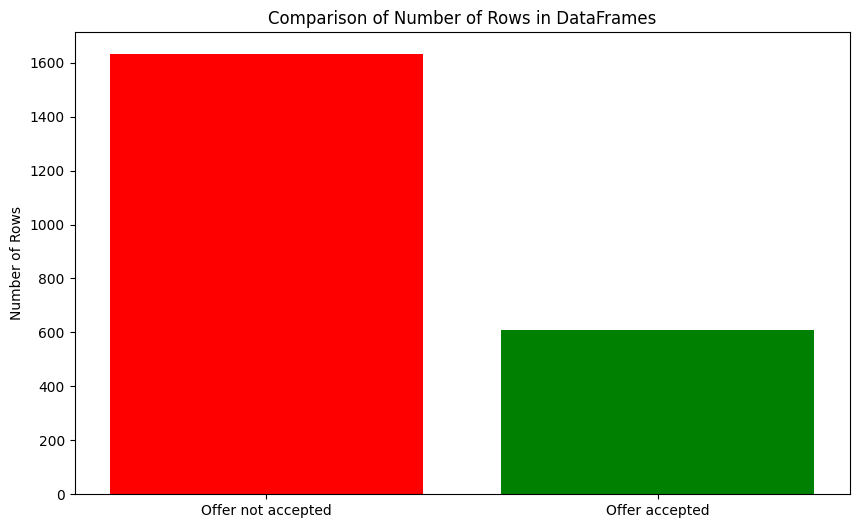

In [7]:
num_rows_filtered_df = len(not_accepted_df)
num_rows_filtered_non_zero_df = len(accepted_df)

# Data for plotting
data = {
    'DataFrame': ['Offer not accepted', 'Offer accepted'],
    'Number of Rows': [num_rows_filtered_df, num_rows_filtered_non_zero_df]
}

# Create a DataFrame for plotting
plot_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(plot_df['DataFrame'], plot_df['Number of Rows'], color=['red', 'green'])
plt.ylabel('Number of Rows')
plt.title('Comparison of Number of Rows in DataFrames')
plt.show()

As can be seen in the graph above, not many consumers have accepted any offers. Additionally, since our purpose is to predict whether marketing campaings work in general and also because there is no description what each individual marketing campaign is, we are creating a new variable `AcceptedCmp` that is 1 if a customer accepted any of the six campaigns (including `Response`) and 0 if a customer did not accept any.

To have a better understanding of the data we explored the number of unique values each cell has

In [8]:
[(column_name, marketing_df[column_name].nunique()) for column_name in list(marketing_df.columns)]

[('ID', 2240),
 ('Year_Birth', 59),
 ('Education', 5),
 ('Marital_Status', 8),
 ('Income', 1974),
 ('Kidhome', 3),
 ('Teenhome', 3),
 ('Dt_Customer', 663),
 ('Recency', 100),
 ('MntWines', 776),
 ('MntFruits', 158),
 ('MntMeatProducts', 558),
 ('MntFishProducts', 182),
 ('MntSweetProducts', 177),
 ('MntGoldProds', 213),
 ('NumDealsPurchases', 15),
 ('NumWebPurchases', 15),
 ('NumCatalogPurchases', 14),
 ('NumStorePurchases', 14),
 ('NumWebVisitsMonth', 16),
 ('AcceptedCmp3', 2),
 ('AcceptedCmp4', 2),
 ('AcceptedCmp5', 2),
 ('AcceptedCmp1', 2),
 ('AcceptedCmp2', 2),
 ('Complain', 2),
 ('Z_CostContact', 1),
 ('Z_Revenue', 1),
 ('Response', 2)]

One thing that stands out is that 'Z_CostContact', 'Z_Revenue' only have one unique value, indicating it is the same for all rows. Additionally, ID number of unique values corresponds to the number of rows in the dataset (not surpresing considering they are used to uniquely identify each customer). Columns with only 2 unique values correspond to our binary variables.


Based on this results, we decided to remove our constant variables.

In [9]:
#some cleaning
#getting rid of 'Z_CostContact' and 'Z_Revenue' constant variables and 'ID'
marketing_df = marketing_df.drop(['Z_CostContact', 'Z_Revenue', 'ID'], axis=1)

#creating AcceptedCmp variable
marketing_df['AcceptedCmp'] = marketing_df[['AcceptedCmp1', 'AcceptedCmp2',
                                            'AcceptedCmp3',
                                            'AcceptedCmp4', 'AcceptedCmp5',
                                            'Response']].max(axis=1)

#dropping unuseful variables
marketing_df = marketing_df.drop(['AcceptedCmp1', 'AcceptedCmp2',
                                  'AcceptedCmp3', 'AcceptedCmp4',
                                  'AcceptedCmp5', 'Response'], axis=1)

marketing_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,172,88,88,3,8,10,4,7,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,2,1,6,2,1,1,2,5,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,111,21,42,1,8,2,10,4,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,10,3,5,2,2,0,4,6,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,46,27,15,5,5,3,6,5,0,0


## Missing values

In [10]:
# Number of missing values
print(marketing_df.isnull().sum())

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
AcceptedCmp             0
dtype: int64


Since only 24 rows have missing values, we are dropping them, believing it will not affect the data:

In [11]:
# Dropping NAs
marketing_df = marketing_df.dropna()

## Outliers

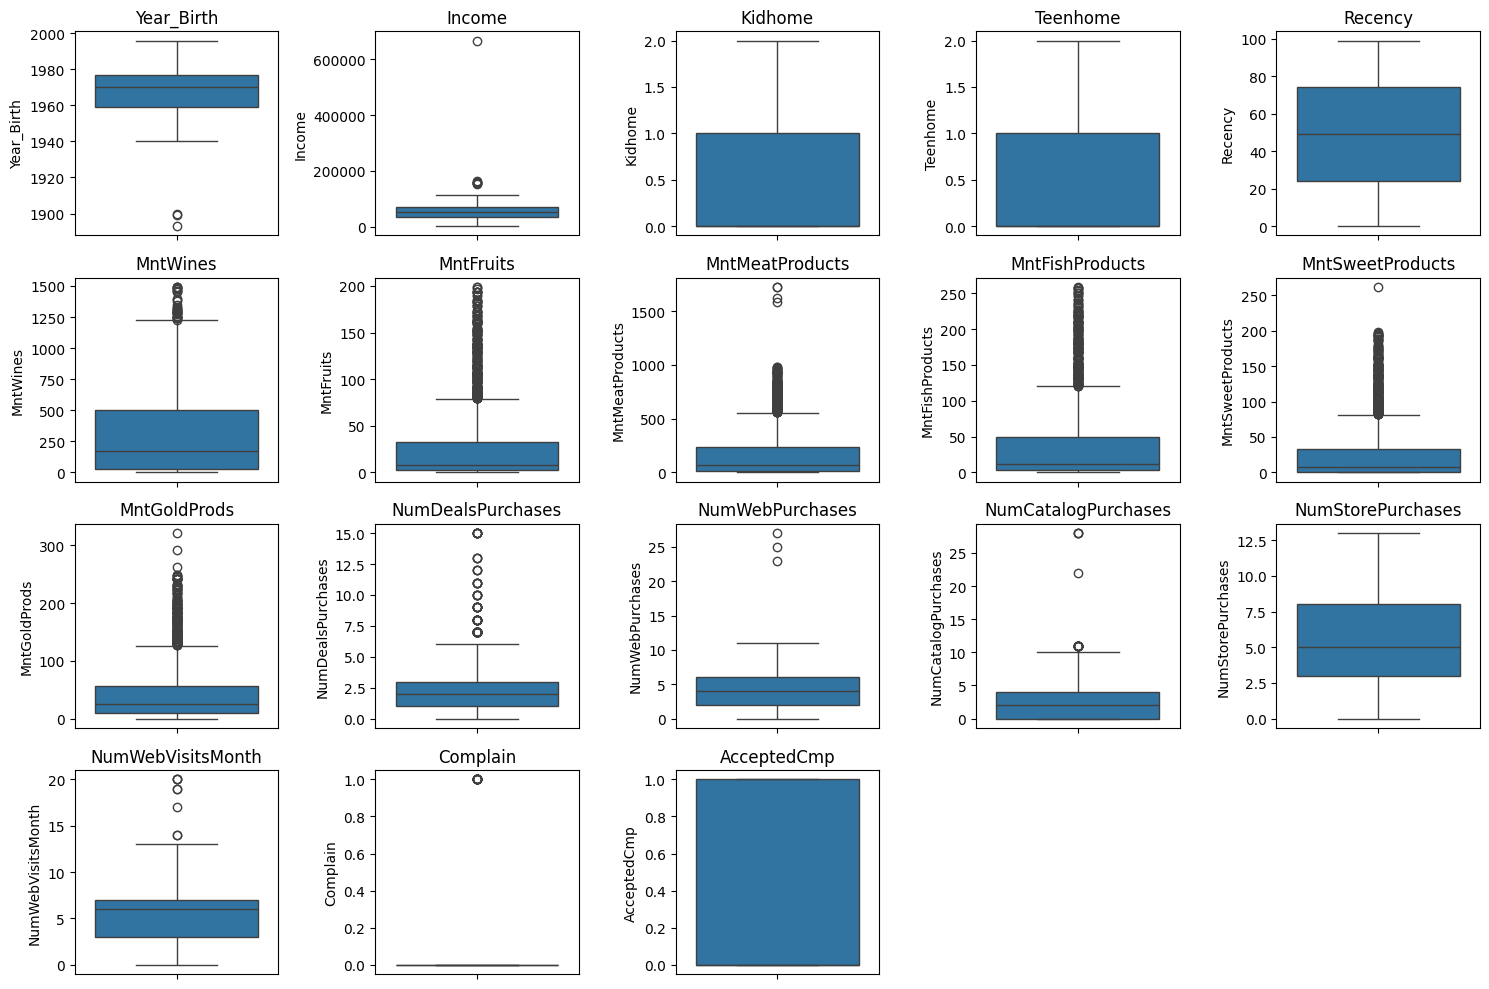

In [12]:
# selecting only numeric variables to check for the ouliers
numerical_columns = marketing_df.select_dtypes(include = ['float64', 'int64']).columns

# create a figure with barplot subplots
plt.figure(figsize = (15, 10))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//5 + 1, 5, i)
    sns.boxplot(y = marketing_df[feature], showfliers = True)
    plt.title(feature)
plt.tight_layout()
plt.show()

It seems like variables `Income`, `NumWebPurchases`, `NumCatalogPurchases` have some outliers.

To further investigate:

In [13]:
# removing outliers for income as there are exceptionally rich customers in our dataset as the plot above illustrates
# creating a function to simplify code
def remove_outliers_iqr(df, selected_columns):
    Q1 = df[selected_columns].quantile(0.25)
    Q3 = df[selected_columns].quantile(0.75)
    IQR = Q3 - Q1

    #
    outlier_mask = ~((df[selected_columns] < (Q1 - 1.5 * IQR)) |
                     (df[selected_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

    # Print summary of removed rows
    print(f"Original dataset size: {len(df)}")
    print(f"Number of rows removed: {len(df) - sum(outlier_mask)}")
    print(f"New dataset size: {sum(outlier_mask)}")

    return df[outlier_mask]
# using function and selecting columns I want to remove outliers from (based on boxplots results)
marketing_df = remove_outliers_iqr(marketing_df, ['Income'])

Original dataset size: 2216
Number of rows removed: 8
New dataset size: 2208


There is a significant bias in the data, if we want to predict this we need to deal with this unbalancedness. Additionally, since we are gonna use models that use distance metrics, we need to standardize our features. The codes for these tasks are located in the **Models** section.

# Exploratory Data Analysis (EDA)

In this section, we included some tables and graphs that help us to learn more about the dataset and to further prepare it for the models. We also analyzed the customer clusters and used association rules for each clusster


In [ ]:
marketing_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,AcceptedCmp
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,1968.807065,51633.638134,0.442029,0.506341,49.014040,306.100996,26.435236,165.347826,37.758605,27.122283,44.110960,2.316576,4.098279,2.644928,5.819293,5.334239,0.009511,0.274004
std,11.991913,20713.376530,0.537063,0.544325,28.938638,337.516270,39.842478,217.852649,54.813323,41.116999,51.852016,1.885450,2.736724,2.798441,3.241866,2.413837,0.097081,0.446112
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51301.000000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,1.000000
max,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


- **`Year_Birth`** - the customers' birth years start with 1893, meaning some customers appeared to be as old as 133 years, which likely represents data entry errors or outliers. To address that, we will remove customers older than 99 years old. The most recent birth year recorded is 1996.

- **`Income`** - the lowest income is 1730, while the highest income is 113734, which suggests a broad income range among customers. The standard deviation of 20713 also shows a considerable spread. 25% of customers earn up to 35,196, the median income is 51,301, and 75% earn up to 68,289.

- **`Kidhome`** - number of kids at home ranges from 0 to 2. The average number of children is 0.44, suggesting many customers may have no children at home.

- **`Teenhome`** - same as with `Kidhome` variable, the range is from 0 to 2. The average number of teenagers customers have is 0.51.

- **`Recency`** - the number of days since the last purchase range from 0 to 99 days. The average recency is around 49 days.

- **`MntWines`** - the average spending on wine is approximately 306. The standard deviation is 337.52, which shows a wide range of spending habits.

- **`MntFruits`** - the average spending on fruits is 26.44. The standard deviation is 39.84 which also shows a relatively big range.

- **`MntMeatProducts`** - the average spending on meat is around 165.35. The standard deviation of 217.85 shows considerable variation.

- **`MntFishProducts`** - the amount spend on fish products ranges form 0 to 259. The average anount is 37.8

- **`MntSweetProducts`** - the spending on sweet products ranges from 0 to 262 with the average of 27.12 and standard deviation of 41.12 that shows a relatively big spread.

- **`MntGoldProds`** - same with the spending on the gold products with the average of 44.11 and standard deviation 51.85.

- **`NumDealsPurchases`** - the number of purchases made using a deal or discount ranges from 0 to 15. The average number is  2.32. Majority of people did not accept any deals.

- **`NumWebPurchases`** - the maximum number of purchases made through the website is 27. The mean is 4.10

- **`NumCatalogPurchases`** - the number of catalog purchases ranges from 0 to 28 purchases. The mean is 2.64 and the standard deviation of 2.80 show that the spread is not that big.

- **`NumStorePurchases`** - the amount purchased in the stores range from 0 to 13. The average is 5.92 and the standard deviation, 3.25, show not a big spread around the mean.

- **`NumWebVisitsMonth`** - the maximum number of times one customer visits a website in a month is 20. Some have visited 0 times. On average, each customer visits the website 5 times a month.

- **`Complain`** - a binary variable. If the value is 1, it means the customer complained. The mean is approximately 0.009, meaning about 0.9% of customers have complained.

- **`AcceptedCmp`** - a binary variable, thus minimum value is 0 and maximum is 1. The mean of 0.273 shows that 27.3% of customers accepted the campaign. The standard deviation of 0.4454 tells us there is a variability in customers' responses to campaigns.

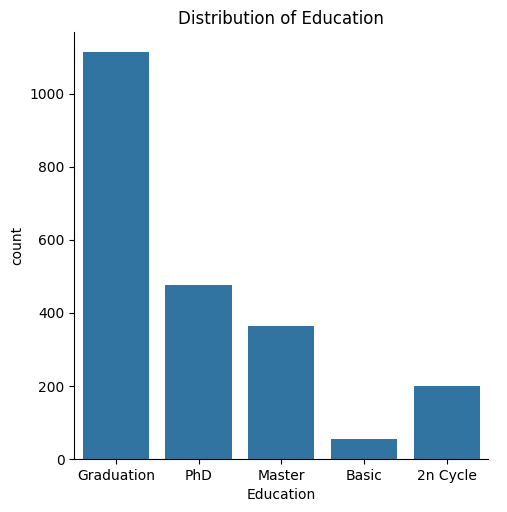

In [14]:
# making a barplot that illustrates all categories of education and their count
sns.catplot(data=marketing_df, x="Education", kind="count")
plt.title('Distribution of Education')
plt.show()

Most of the users graduated, due to the lack of information it is unclear whether this means graduated from University, High School, or Middle School, etc. The least common level of education of respondents' is basic which means primary and lower secondary education (elementary and middle school). After further research it was discovered that most 2n cycle (second cycle) programs award a master degree (Second-cycle Programmes, 2023), so this category will be combined with Master Education.

In [15]:
#replacing '2n Cycle' with 'Master'
marketing_df['Education'] = marketing_df['Education'].replace({'2n Cycle': 'Master'})
# looking at the new distribution
marketing_df['Education'].value_counts() # actual count/values

,count
Education,
Graduation,1113
Master,564
PhD,477
Basic,54


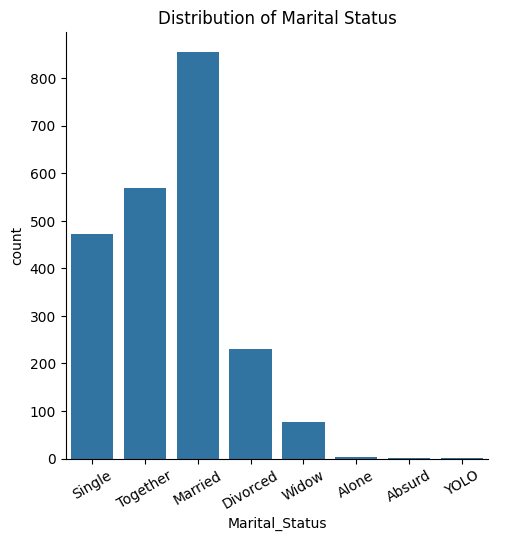

In [16]:
# making a barplot that illustrates all categories of marital status and their count
sns.catplot(data=marketing_df, x="Marital_Status", kind="count",)
plt.title('Distribution of Marital Status') # title
plt.xticks(rotation=30) # rotating labels so it is visible
plt.show()

In [17]:
# counting marital statuses
marketing_df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,854
Together,569
Single,471
Divorced,231
Widow,76
Alone,3
Absurd,2
YOLO,2


Above, we can see that there are some interesting `Marital_Status` categories, such as *Alone*, *Absurd*, and *YOLO*. We have decided to add *Alone* customers to the Singles, and get rid of the *Absurd* and *YOLO* ones.

In [18]:
#replacing 'Alone' with 'Single'
marketing_df['Marital_Status'] = marketing_df['Marital_Status'].replace({'Alone': 'Single'})

#remowing rows where Marital_Status is 'Absurd' or 'YOLO'
marketing_df = marketing_df[~marketing_df['Marital_Status'].isin(['Absurd', 'YOLO'])]

# counting marital statuses
marketing_df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,854
Together,569
Single,474
Divorced,231
Widow,76


In [19]:
# changing date of birth to 'Age'
marketing_df.loc[:, 'Age'] = datetime.datetime.now().year - marketing_df['Year_Birth']
marketing_df['Age'].describe()

<ipython-input-19-2a5912e9eb9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_df.loc[:, 'Age'] = datetime.datetime.now().year - marketing_df['Year_Birth']


,Age
count,2204.000000
mean,55.202359
std,11.988415
min,28.000000
25%,47.000000
50%,54.000000
75%,65.000000
max,131.000000


In [20]:
# remove observations with the ages above 99
marketing_df = marketing_df[marketing_df['Age'] <= 99]

# categorize the ages
def categorize_age(age):
    if age <= 35:
        return 'Young'
    elif 36 <= age <= 59:
        return 'MiddleAge'
    else:
        return 'Elderly'

marketing_df['Age'] = marketing_df['Age'].apply(categorize_age)

marketing_df['Age'].value_counts()

<ipython-input-20-b001c3a5be30>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_df['Age'] = marketing_df['Age'].apply(categorize_age)


,count
Age,
MiddleAge,1342
Elderly,770
Young,89


In [21]:
# Checking whether there are duplicated values
marketing_df.duplicated().sum()

190

Apparantly there are 190 customers that have many features in common with the rest of the dataset except for the `Age` feature.

In [22]:
# getting rid of the duplicates
marketing_df.drop_duplicates(inplace=True)

In [23]:
# checking the number of rows
marketing_df.shape

(2011, 22)

In [24]:
#dropping Year_Birth variable
marketing_df = marketing_df.drop(['Year_Birth'], axis=1)

## Spending Patterns and Purchasing Channels Analysis

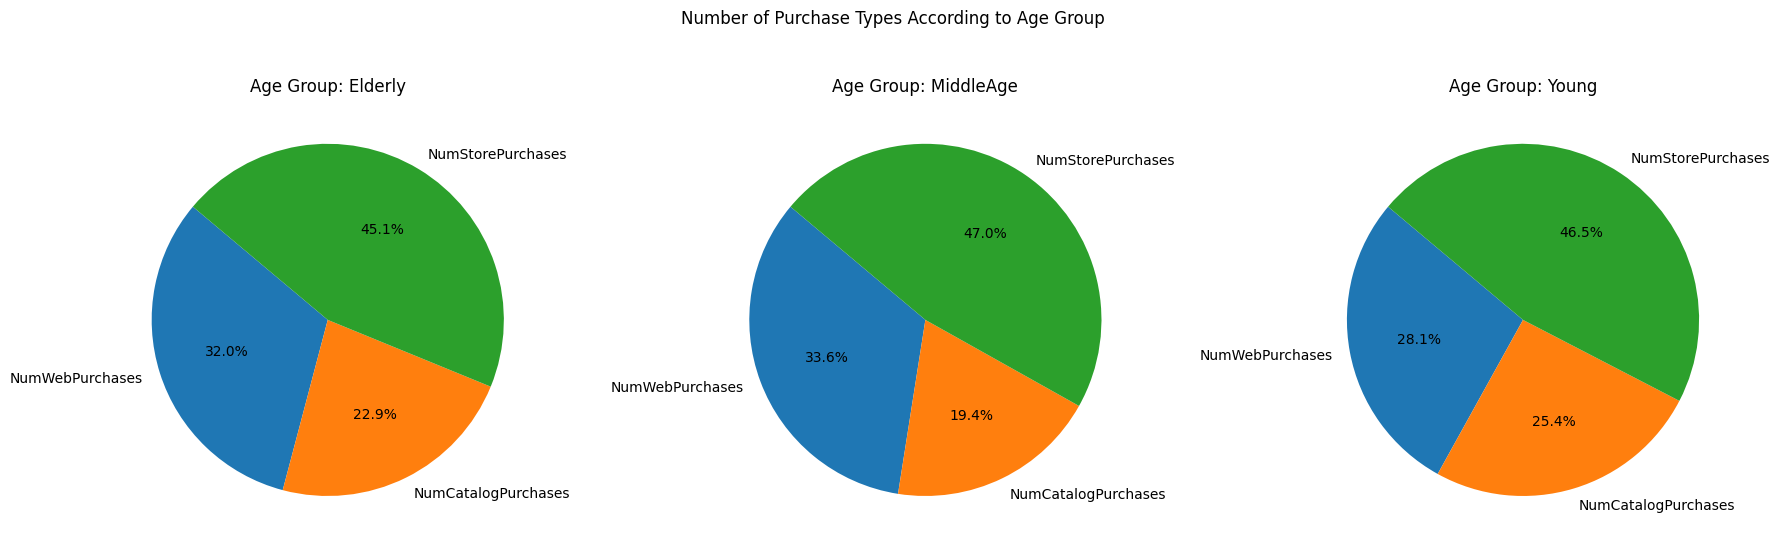

In [25]:
# analyzing purchasing ways according to 'Age'
age_purchase_summary = marketing_df.groupby("Age")[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum()

# setting up subplots
fig, axes = plt.subplots(1, len(age_purchase_summary.index), figsize=(18, 6))

# making a pie chart in each subplot
for i, age in enumerate(age_purchase_summary.index):
    purchases = age_purchase_summary.loc[age]
    axes[i].pie(purchases, labels=purchases.index, autopct = '%1.1f%%', startangle = 140)
    axes[i].set_title(f"Age Group: {age}")

plt.suptitle("Number of Purchase Types According to Age Group")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

From the pie charts above, we can see that the distribution of the Purchasing channels is more or less the same among three age groups with Store Purchases being the most popular option, and Catalog purchases the least. Elderly people using catalogs slightly more compared to other two age groups.

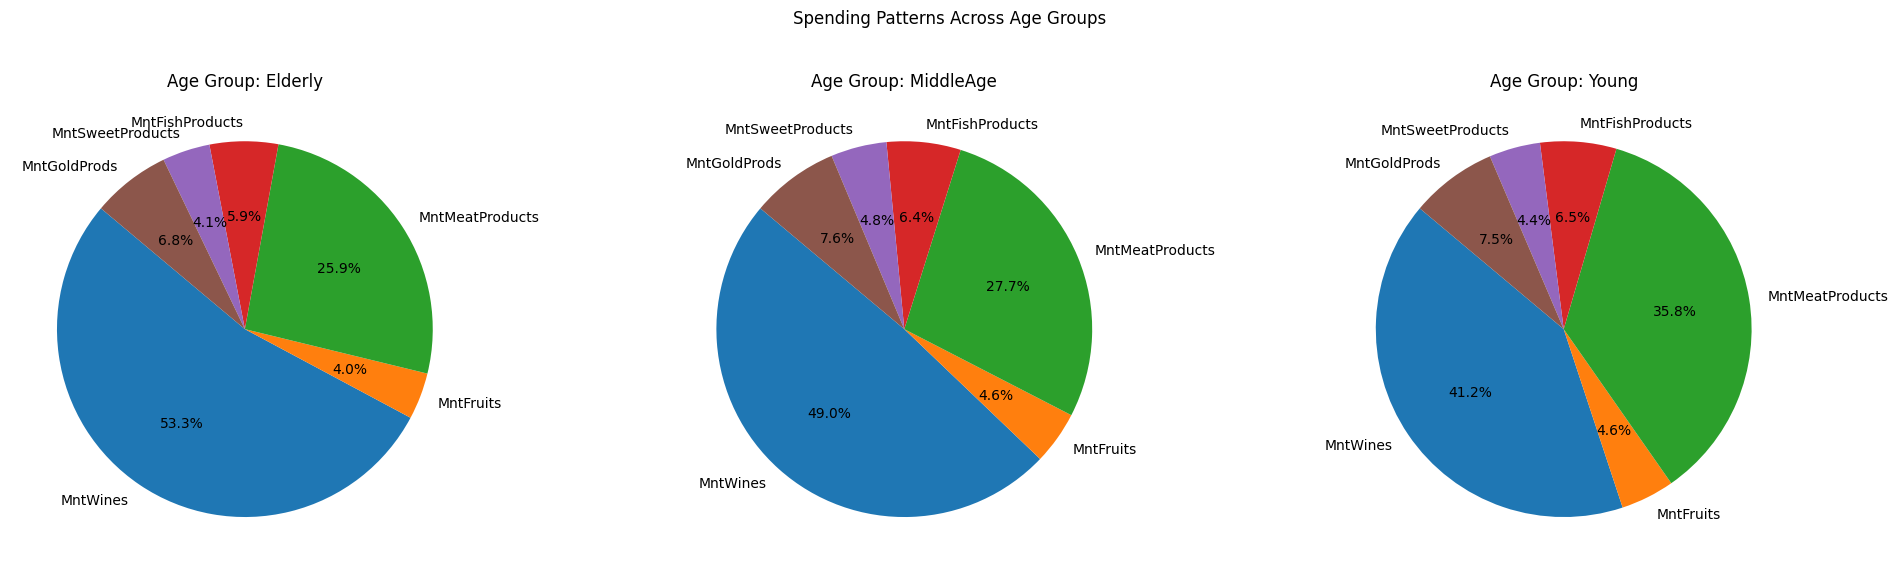

In [26]:
# analyzing spending patterns across age groups
age_spend_summary = marketing_df.groupby("Age")[
    ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
     "MntSweetProducts", "MntGoldProds"]
].sum()

# setting the subplots
fig, axes = plt.subplots(1, len(age_spend_summary.index), figsize=(20, 6))

# creating a pie chart for each age group
for i, age in enumerate(age_spend_summary.index):
    spending = age_spend_summary.loc[age]
    axes[i].pie(spending, labels=spending.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f"Age Group: {age}")

plt.suptitle("Spending Patterns Across Age Groups")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The amount spent on wine is the highest among all age groups, however, it can be due to the general higher price of wine products. Overall, the spending patterns are more-or-less similar. Elder people spend more on wines (might be due to the higher income) and young customers spend more on meat products.

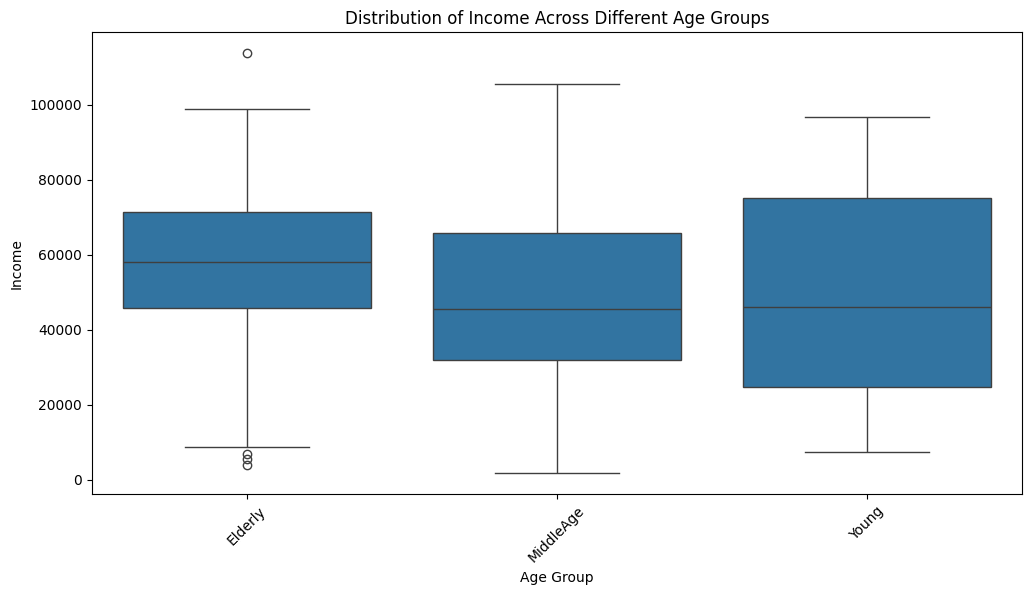

In [27]:
# making a boxplot to show the distribution of Income across different Age groups
plt.figure(figsize=(12, 6))
sns.boxplot(data = marketing_df, x = "Age", y = "Income")
plt.title("Distribution of Income Across Different Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.show()

The elderly people have higher median income compared to the other groups and they also have several outliers both on the higher and lower ends. The 'Young' group has a more compact range, which suggests less income variability.

## Correlation Heatmap

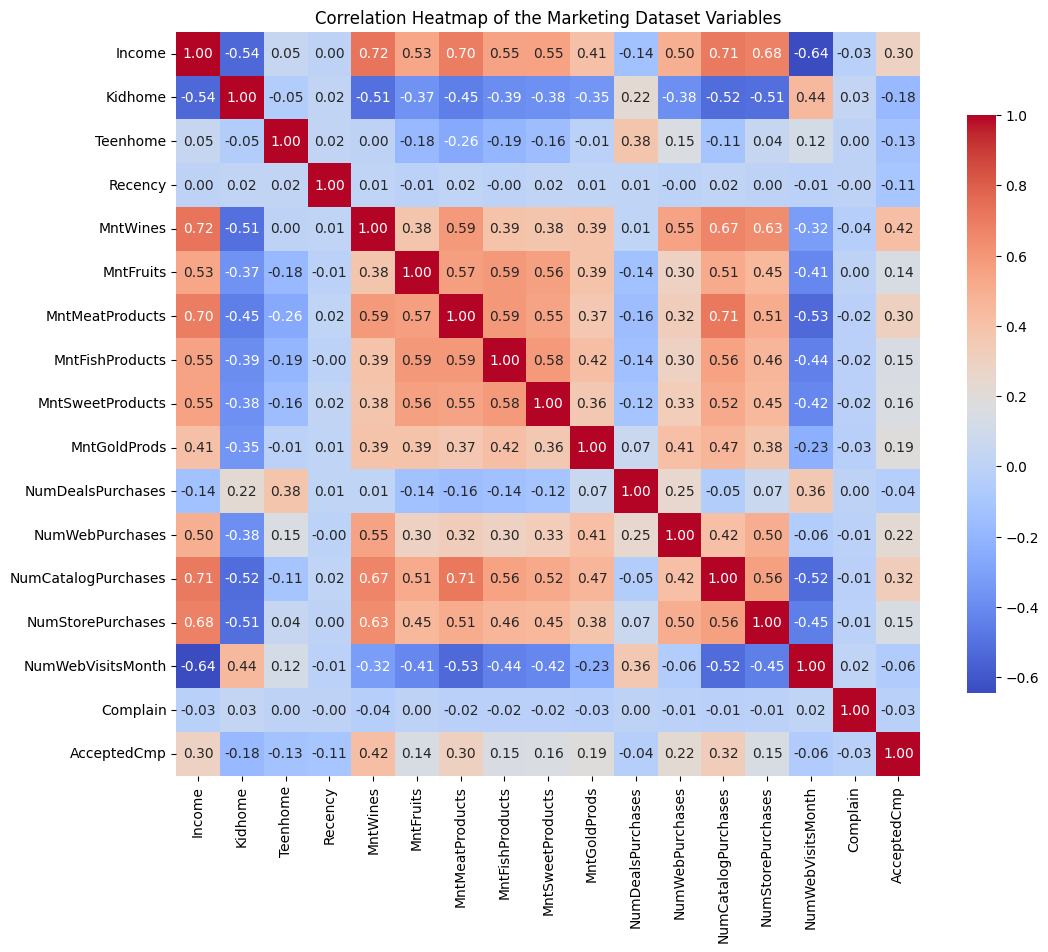

In [28]:
# including only numeric variables
numeric_df = marketing_df.select_dtypes(include=[np.number])

# computing correlation matrix
corr_matrix = numeric_df.corr()

# plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation Heatmap of the Marketing Dataset Variables")
plt.show()

Conclusions from the Heatmap:

`Income` variable has a strong positive relationship with the `MntWines` (0.72) and `MntMeatProducts` (0.70), meaning customers with higher income tend to spend more on wine and meat products. Customers with higher income tend to buy products from the catalogs more as well (0.71).

The correlation factor of 0.52 between `NumCatalogPurchases` and `NumWebPurchases` suggests that customers who buy through catalogs may also shop online frequently, which could indicate that these customers prefer non-store purchasing channels. Moreover, higher-income customers visit the website less frequently per month (-0.64), possibly because they are more decisive in their purchasing or use other channels.

Another interesting insight is that having children in the household appears to be negatively correlated with spending on wine and meat products, indicating that customers with children might spend less on luxury items. Another reason might be that the customers with kids tend to have lower income (-0.54).

`NumDealsPurchases` has a positive relationship with the number of teenagers at home (0.38) and `NumWebVisitsMonth` (0.36). Customers that visit websites might be more aware of the deals.


## Clustering


Both of the clustering algorithms used will be distance-based so prior to training it it is crucial to standardized the variables so they have equal weight to the model.

Since StandardScalar() only works with numeric data, we first need to handle our non-numeric features (Education, Marital_Status, Dt_Customer, Age)

Since Marital_status, Age, and Education are categorical one hot encoding will be implemented.

As we previously saw when looking at number of unique values in each row, Dt_Customer has 662 unique values. This would mean adding 662 additional columns to our dataset if we were to treat date as a dummy. This in practice makes no sense since it is not a categorical variable and would increase dimesnsionality by a lot. Thus, this varaible is dropped before performing clustering.



In [29]:
# performing one-hot scaling on categroical variables so you can
df_encoded = pd.get_dummies(marketing_df, columns= ["Education", "Marital_Status", 'Age'], dtype='int') # making output an int instead of boolean

# dropping Dt_Customer as this variable is non_numeric and one-hot-encoding would result in 662 additional columns
df_encoded = df_encoded.drop(["Dt_Customer"], axis = 1)

# scaling our data
scaler = StandardScaler() # standardizing data
marketing_normalized = scaler.fit_transform(df_encoded)

#turning output into a dataframe
marketing_df_normalized = pd.DataFrame(marketing_normalized, index=df_encoded.index, columns=df_encoded.columns)

In [30]:
marketing_df_normalized.info() # looking at the new dataset after adding/removing features

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2011 non-null   float64
 1   Kidhome                  2011 non-null   float64
 2   Teenhome                 2011 non-null   float64
 3   Recency                  2011 non-null   float64
 4   MntWines                 2011 non-null   float64
 5   MntFruits                2011 non-null   float64
 6   MntMeatProducts          2011 non-null   float64
 7   MntFishProducts          2011 non-null   float64
 8   MntSweetProducts         2011 non-null   float64
 9   MntGoldProds             2011 non-null   float64
 10  NumDealsPurchases        2011 non-null   float64
 11  NumWebPurchases          2011 non-null   float64
 12  NumCatalogPurchases      2011 non-null   float64
 13  NumStorePurchases        2011 non-null   float64
 14  NumWebVisitsMonth        2011

### Agglomerative Clustering

We will start by defining a function to see what distance threshold will lead to a reasonable number of clusters according to the business objectives (around 3 - 10 clusters). The function will also display the resulting size of the clusters.

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from collections import Counter
counter=Counter

def explore_clusters(data,  distance_threshold, method='method_of_linkage_to_be_used'):

    #Initialize linkage
    Z = linkage(data, method=method)

    # Create clusters using the specified distance threshold
    clusters = cut_tree(Z, height=distance_threshold).flatten()
    clusters = [int(x) for x in clusters]

    # Count the number of unique clusters and check their size
    num_clusters = len(np.unique(clusters))
    size_clusters=counter(clusters)
    output = ", ".join(f"{item}: {count}" for item, count in size_clusters.most_common(10))

    #Print the information
    print("Distance threshold: ", distance_threshold)
    print(f"Number of clusters formed: {num_clusters}")
    print("Size of clusters: ", output)


Here we will do some experimentation to estimate the approximate height needed to achieve a reasonable number of clusters. We will first try using single linkage, later moving on to other linkage types.

In [32]:
#Explorative analysis - Single Linkage

for distance_threshold in np.linspace(start=1, stop=10, num=10):
    explore_clusters(marketing_df_normalized, distance_threshold=distance_threshold, method="single")

Distance threshold:  1.0
Number of clusters formed: 1755
Size of clusters:  73: 47, 3: 31, 40: 25, 47: 17, 228: 12, 80: 8, 35: 7, 67: 7, 59: 6, 200: 6
Distance threshold:  2.0
Number of clusters formed: 1254
Size of clusters:  13: 116, 3: 63, 33: 58, 23: 54, 90: 33, 7: 28, 61: 21, 174: 19, 17: 17, 53: 16
Distance threshold:  3.0
Number of clusters formed: 636
Size of clusters:  12: 241, 3: 162, 19: 103, 25: 101, 5: 99, 4: 85, 7: 66, 15: 45, 6: 40, 18: 40
Distance threshold:  4.0
Number of clusters formed: 144
Size of clusters:  0: 1700, 6: 43, 2: 37, 4: 27, 15: 14, 41: 10, 19: 7, 18: 6, 20: 6, 44: 5
Distance threshold:  5.0
Number of clusters formed: 38
Size of clusters:  0: 1789, 5: 63, 4: 61, 2: 37, 6: 15, 11: 10, 8: 3, 1: 2, 19: 2, 3: 1
Distance threshold:  6.0
Number of clusters formed: 12
Size of clusters:  0: 1935, 1: 48, 3: 18, 7: 2, 2: 1, 4: 1, 5: 1, 6: 1, 8: 1, 9: 1
Distance threshold:  7.0
Number of clusters formed: 7
Size of clusters:  0: 1985, 2: 18, 3: 3, 4: 2, 1: 1, 5: 1,

As we can see, a reasonable number of clusters can be achieved with the distance thresholds of 7, 8, 9, and do. However, there appears to be an issue with how clusters are assigned, since even at 12 clusters, a reasonably high number, more than 90% of the cases are assigned to a single cluster (1935 out of 2011). Let's consider other types of linkages if they manage to produce better results.

In [33]:
#Explorative analysis - Complete Linkage

for distance_threshold in np.linspace(start=10, stop=19, num=10):
    explore_clusters(marketing_df_normalized, distance_threshold=distance_threshold, method="complete")

Distance threshold:  10.0
Number of clusters formed: 22
Size of clusters:  1: 1071, 0: 146, 12: 125, 7: 105, 11: 103, 2: 86, 8: 74, 10: 49, 4: 48, 13: 44
Distance threshold:  11.0
Number of clusters formed: 14
Size of clusters:  1: 1071, 9: 272, 2: 191, 0: 188, 6: 74, 8: 69, 7: 65, 4: 49, 10: 19, 3: 6
Distance threshold:  12.0
Number of clusters formed: 10
Size of clusters:  1: 1145, 0: 379, 7: 272, 6: 69, 5: 65, 3: 49, 8: 19, 2: 9, 9: 3, 4: 1
Distance threshold:  13.0
Number of clusters formed: 6
Size of clusters:  0: 1930, 2: 49, 4: 19, 1: 9, 5: 3, 3: 1
Distance threshold:  14.0
Number of clusters formed: 6
Size of clusters:  0: 1930, 2: 49, 4: 19, 1: 9, 5: 3, 3: 1
Distance threshold:  15.0
Number of clusters formed: 5
Size of clusters:  0: 1930, 1: 58, 3: 19, 4: 3, 2: 1
Distance threshold:  16.0
Number of clusters formed: 4
Size of clusters:  0: 1933, 1: 58, 3: 19, 2: 1
Distance threshold:  17.0
Number of clusters formed: 4
Size of clusters:  0: 1933, 1: 58, 3: 19, 2: 1
Distance thr

Complete linkage produces similar results to the single linkage, with the overwhelming majority of cases getting assigned to a single largest cluster. Let's explore average linkage.

In [34]:
#Explorative analysis - Average Linkage

for distance_threshold in np.linspace(start=5, stop=15, num=11):
    explore_clusters(marketing_df_normalized, distance_threshold=distance_threshold, method="average")

Distance threshold:  5.0
Number of clusters formed: 217
Size of clusters:  3: 308, 14: 156, 17: 114, 4: 104, 42: 67, 22: 60, 10: 49, 23: 41, 61: 39, 1: 38
Distance threshold:  6.0
Number of clusters formed: 82
Size of clusters:  1: 793, 23: 160, 8: 116, 19: 66, 10: 63, 3: 62, 9: 55, 33: 53, 15: 51, 16: 47
Distance threshold:  7.0
Number of clusters formed: 34
Size of clusters:  1: 1257, 0: 293, 5: 117, 2: 87, 9: 52, 4: 47, 12: 35, 8: 30, 7: 17, 14: 13
Distance threshold:  8.0
Number of clusters formed: 16
Size of clusters:  0: 1791, 5: 69, 4: 65, 2: 48, 6: 18, 8: 4, 7: 3, 10: 3, 1: 2, 12: 2
Distance threshold:  9.0
Number of clusters formed: 10
Size of clusters:  0: 1929, 2: 49, 4: 18, 5: 4, 1: 3, 6: 3, 7: 2, 3: 1, 8: 1, 9: 1
Distance threshold:  10.0
Number of clusters formed: 6
Size of clusters:  0: 1985, 2: 19, 3: 3, 4: 2, 1: 1, 5: 1
Distance threshold:  11.0
Number of clusters formed: 6
Size of clusters:  0: 1985, 2: 19, 3: 3, 4: 2, 1: 1, 5: 1
Distance threshold:  12.0
Number of cl

Again, a similar pattern is visible with average linkage agglomerative clustering. Let's also illustrate it for easier understanding. We will pick a relatively high number of clusters - 10 -  which still remains potentially practically useful given the size of the dataset. We will then use a 3-dimensional dataset created with principle component analysis to plot the clusters against each other.  

TypeError: 'Path3DCollection' object is not iterable

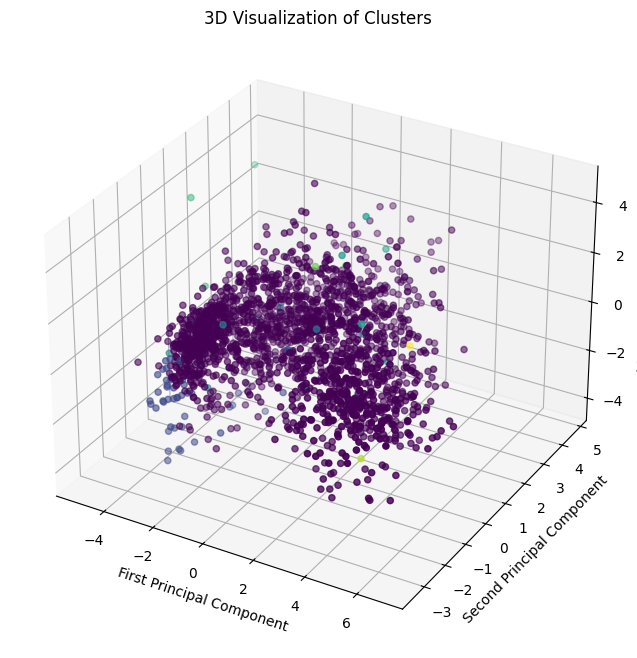

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Create a dataset with 3 dimensions
pca = PCA(n_components=3)
pca_data = pca.fit_transform(marketing_df_normalized)

# running average linkage model that produces 10 clusters
Z_final = linkage(marketing_df_normalized, method="average")
clusters_final = cut_tree(Z_final, height=9).flatten()

# creating a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# plotting points
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2],
                    c=clusters_final, cmap='viridis')

# Add labels and title
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.title('3D Visualization of Clusters')

# Add colorbar
ax.legend(scatter)
plt.show()

With 10 clusters, we see that an overwhelming majority of cases are assigned to the purple color. Although we see one reasonably-sized cluster colored in blue, all the rest of 8 clusters consist of a maximum couple of cases. We have seen the same pattern for all types of linkages, and only a very low distance threshold resulting in hunderds of clusters can prevent excessive concentration around a single cluster. This, however, would make the analysis highly impractical for business purposes, since operating with hundreds of clusters would be analytically close to impossible. Essentially, this extreme concentration of cases into one cluster defeats the purpose of clustering, which in our opinion makes it futile applying other analysis techniques, such as Silhouette score. Instead, we need to search for a better clustering algorithm, so we will now attempt k-means clustering.

### K Means


Now we can continue with applying the K means algorithm. To use this model, we need to predetermine the number of clusters (K), so multiples K will be considered at the beginning to compare them and select the optimal number. To determine what K value we should use the elbow method will be applied along with Silhouette Analysis

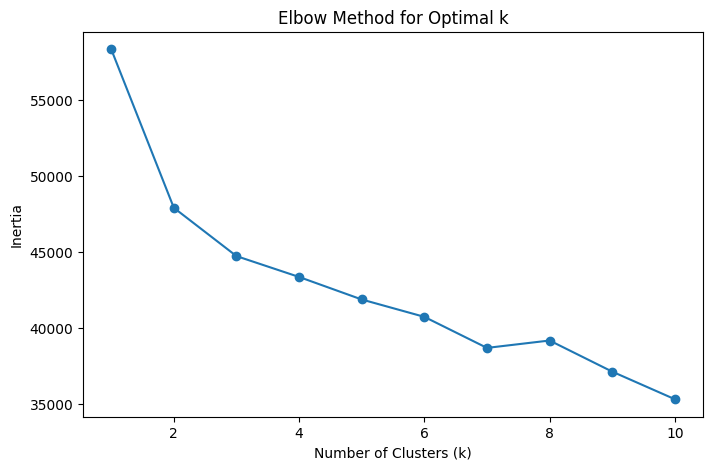

In [37]:
# performing K-means clustering for each number of clusters (1-11 clusters)
from sklearn.cluster import KMeans
inertia = []  # list to hold sum of squared errors for each k
k_values = range(1, 11)  # k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(marketing_df_normalized)
    inertia.append(kmeans.inertia_)  # inertia aka sum of squared distances to nearest cluster center

# plotting the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

Based on this illustration, it is not exactly clear what the optimal number of clusters should be. We would argue that there are actually two potential "elbows", one where k=3 and another where k =7. The first major slope change happens at k = 3 (steepest drop in inertia) as after this point inertia decreases at a diminishing rate. One could argue however that the slope change between 6 and 7 number of clusters is also very definitive, so could be considered the elbow. Since it is not very clear what the optimal number of clusters should be we perform Silhouette Analysis.  

Another common measure that is used to determine the ideal number of clusters is the Silhouette Score. The score ranges from -1 to 1. A score close to one indicates that the sample is well defined in its cluster as it is far away from neighboring ones. Close to zero means that the sample is extremely close to belonging to two different clusters that are close to each other. While -1 indicates that samples may have been assigned to the wrong clusters (Selecting the Number of Clusters With Silhouette Analysis on KMeans Clustering, n.d.).

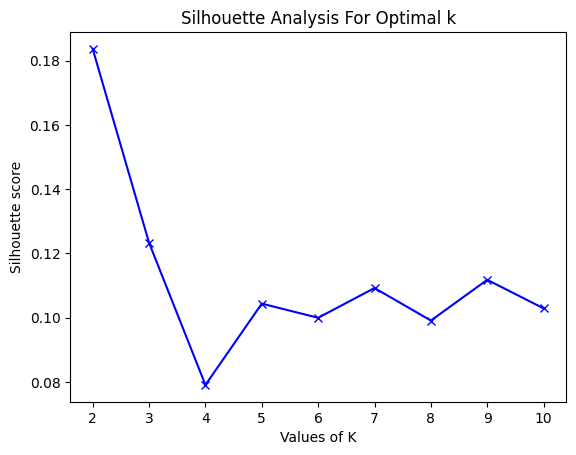

In [38]:
silhouette_avg = [] # list where avg silhoutte scores of each k means algorithm will go

for num_clusters in range(2, 11): # initialize with 2 as 1 gives an error
 # initialize kmeans
 kmeans = KMeans(n_clusters=num_clusters, random_state=42)
 kmeans.fit(marketing_df_normalized)
 cluster_labels = kmeans.labels_

 # calculating the average silhouette score
 silhouette_avg.append(silhouette_score(marketing_df_normalized, cluster_labels))

# making a visualization that shows different scores
plt.plot(range(2, 11), silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

 Based on the silhouette scores, 2 clusters is the optimal number because it has the highest silhouette score (about 0.18). Hence, in comparison to the other values of K, having two clusters provides the best-defined and most separated clusters.

 Although the highest, a silhouette score of 0.18 is extremely low and very close to 0, indicating there is some overlap between clusters. Thus, the clusters detected are considered weak clusters. The next best score is around 0.12 with a k value of 3.

 The silhouette score decreases drastically from k=2 to k= 4, a difference of around 0.10 points. From this point onwards scores generally begin to increase slightly but never reach the level of having two clusters.  

 By taking both measures and methods into account, the optimal number of clusters was chosen to be 3. This number of clusters has somewhat reasonable silhouette scores (in comparison to the other number of clusters) and a sufficient reduction in inertia. K =7 was also considered, but since k=3 has a higher silhouette score it was preferred. K = 2 was also not chosen since interia continued dropping to an important level after this point (refer back to the elbow method graph)    

Now that we have determined the optimal number of clusters we will look at pairplots of variables that describe the amount spent on specific products. Our goal with this plots is to see how each feature contributes to cluster formation and spot whether there are distinguishable patterns within and across clusters

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


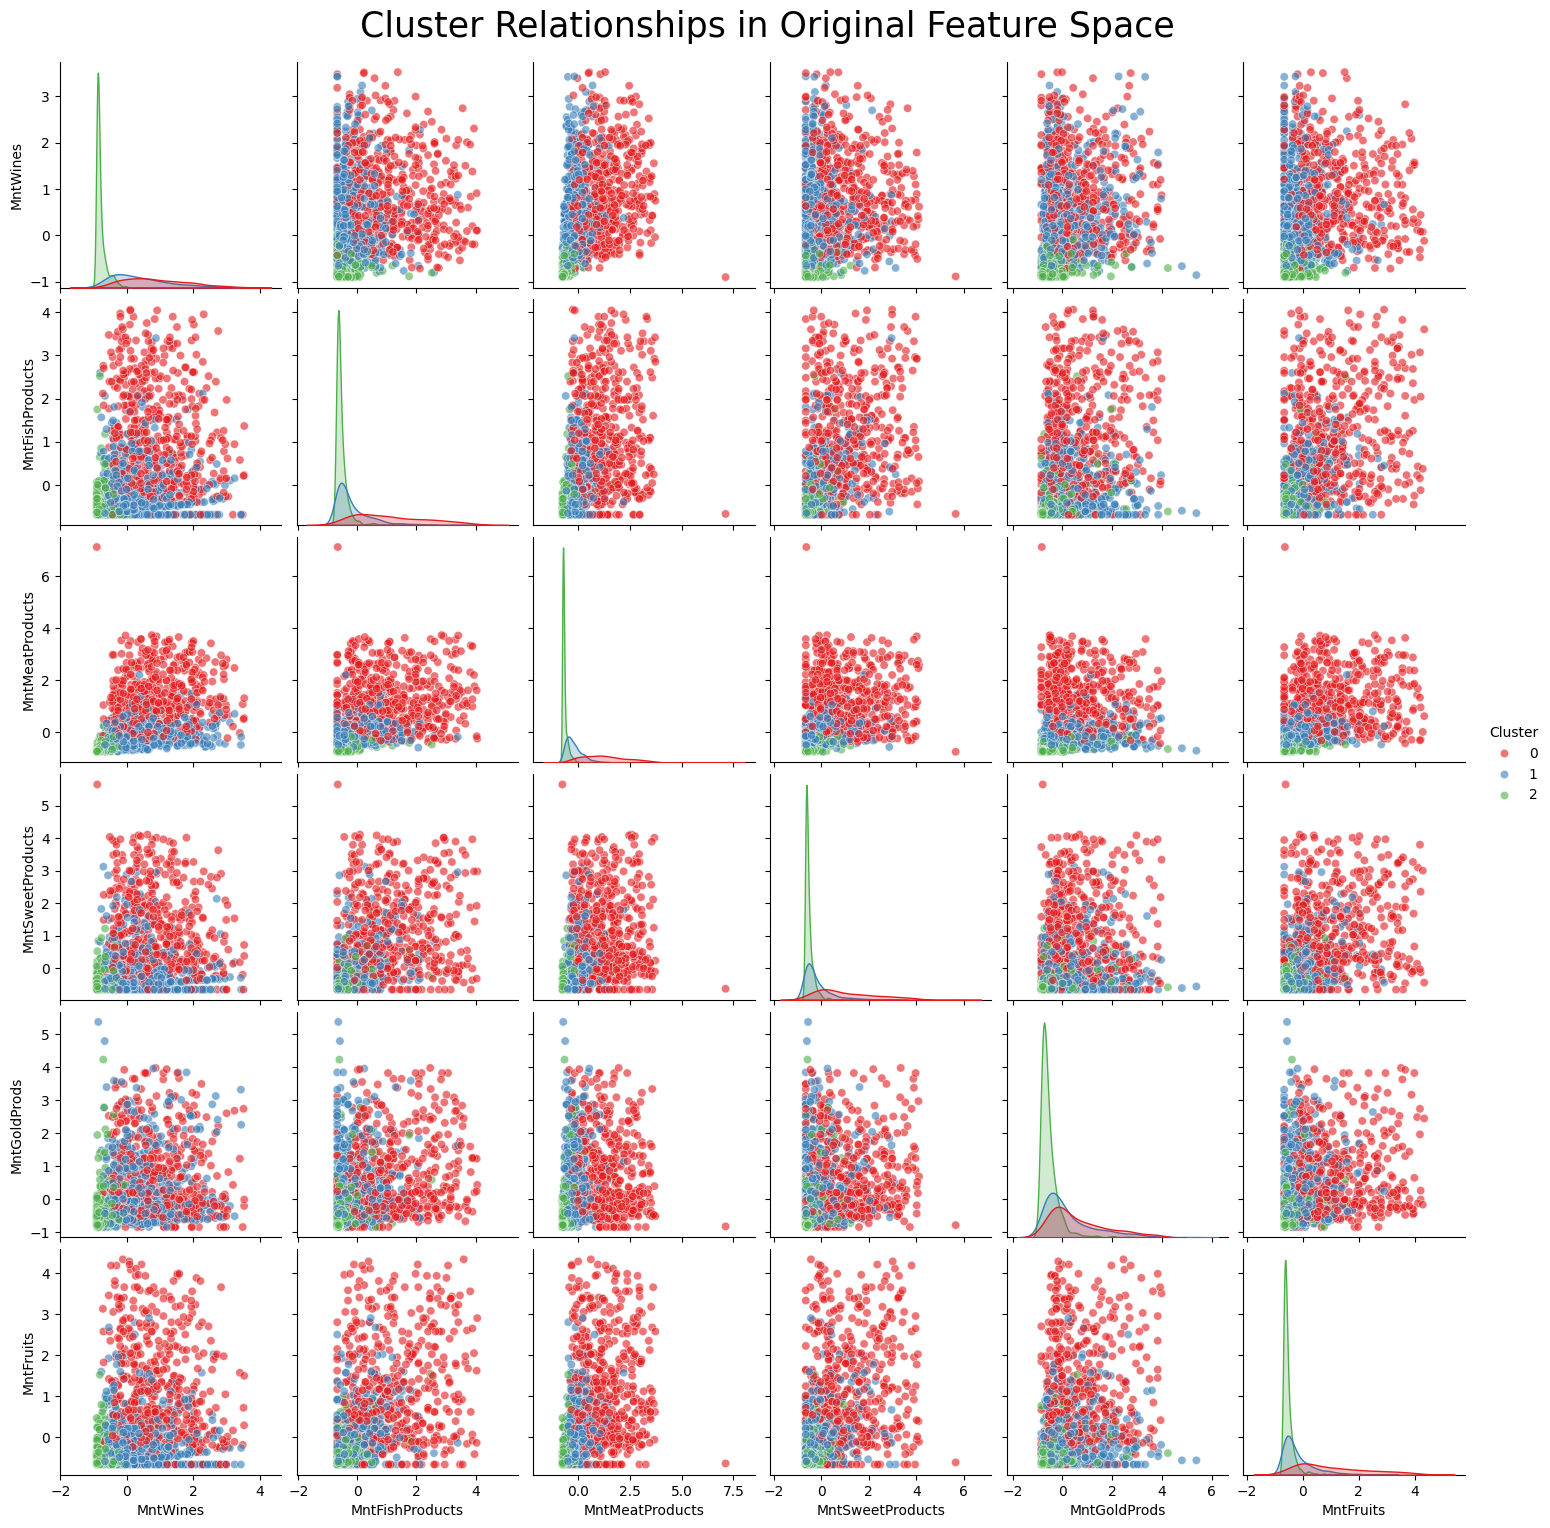

In [51]:
# running final model with 3 clusters
kmeans_3 = KMeans(n_clusters = 3, random_state =42)
kmeans_3.fit(marketing_df_normalized)
labels = kmeans_3.labels_ # defining cluster labels for each customer

# creating a pairwise plot with several variables

cluster_df = marketing_df_normalized.copy() # making a copy of our original dataset
cluster_df['Cluster'] = labels # adding a column with cluster labels so we are able to visualize data

# creating a color palette for 3 colors
colors = sns.color_palette('Set1', n_colors=3)

# creating pairplot with original features
pplot = sns.pairplot(cluster_df,
             vars=['MntWines', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts', 'MntGoldProds', "MntFruits"],
             hue='Cluster',
             palette = colors,
             corner = False,
             plot_kws={'alpha': 0.6})

plt.suptitle('Cluster Relationships in Original Feature Space', y=1.02, size = 25)
plt.show()

The density plots reveal that there is quite a lot of overlap between different clusters. This is not surprsing considering the low silhouette scores we got. In particular, overlapping tends to be worse between the green and the blue clusters in most features. The red category appears to have some outliers as in most scatter plots there are red dots that are far away from the rest of the data. Customers that belong to the red cluster tend to be located in the upper and right-most ranges of spending across different product categories, indicating more spending. On the other hand, customers belonging to the blue and green clusters tend to be more concentrated in the left for most product categories, indicating a tendency to spend less of these goods than some customers from the red cluster.  

## Association Rule Analysis

We can uncover specific product or attribute combinations that are more relevant to each customer group. To analyze what each cluster represents, we are performing association rule analysis within each cluster.  

In [52]:
# adding cluster labels to the original dataset
marketing_df_clus = marketing_df.join(cluster_df['Cluster'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Number of Deals Purchased')

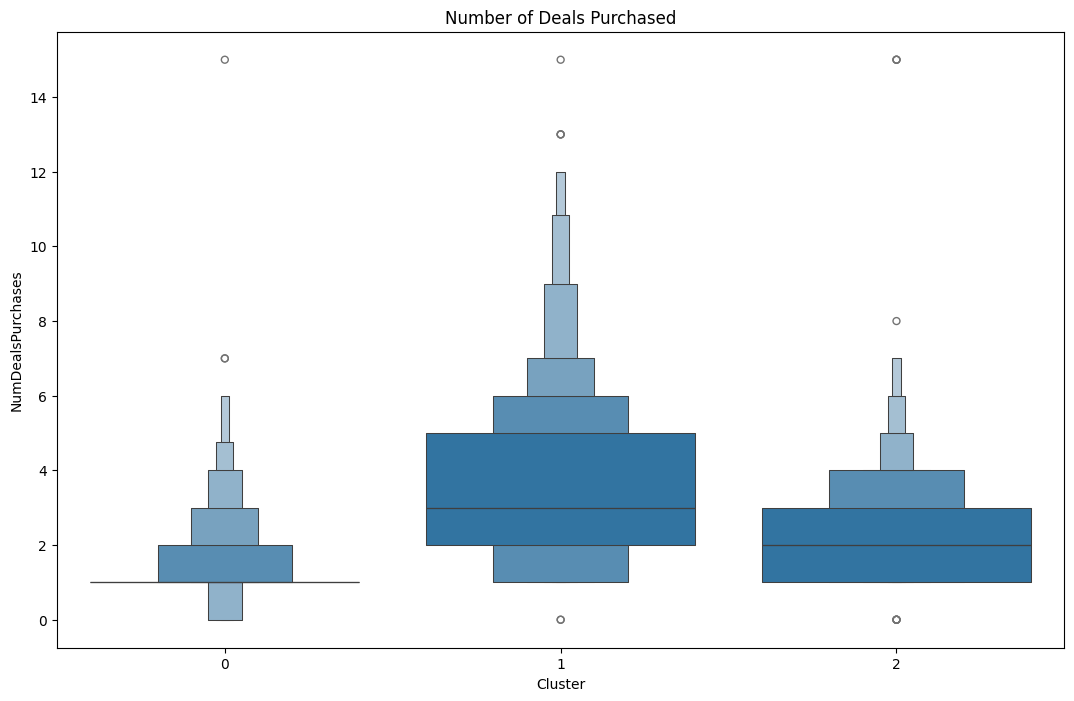

In [53]:
plt.figure(figsize = (13, 8))
pl=sns.boxenplot(y = marketing_df_clus['NumDealsPurchases'], x = marketing_df_clus['Cluster'])
pl.set_title('Number of Deals Purchased')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


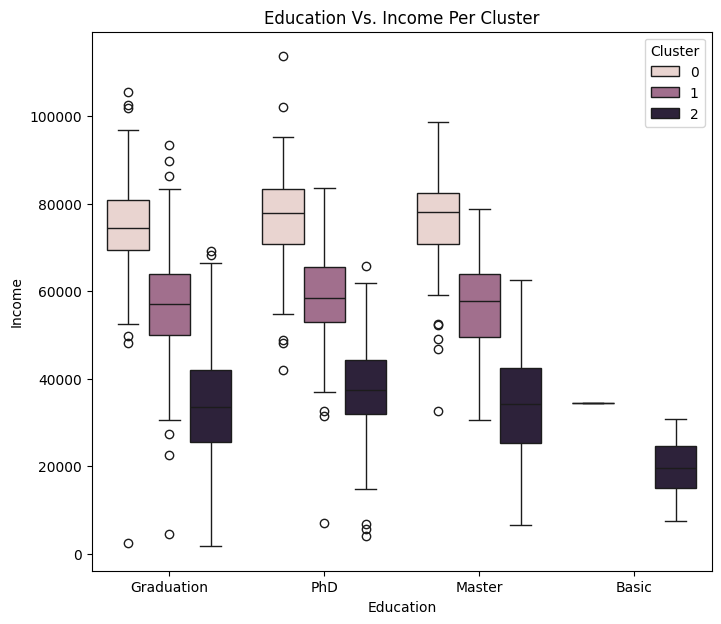

In [54]:
plt.figure(figsize = (8, 7))
pl=sns.boxplot(x = marketing_df_clus['Education'], y = marketing_df_clus['Income'], hue = marketing_df_clus['Cluster'])
pl.set_title("Education Vs. Income Per Cluster")
plt.show()

From the plot above, we can see that customers from the cluster 0 have higher level of income. Customers from cluster 2 have lower income and "basic" level of education.

In order to perform an Association Rule analysis, the dataset should be binary. However, since we have information on the amount of money spent on each product, to make those purchases binary is a bit tricky. What we can do, is to encode those variables based on the top percentiles.

In [55]:
# storing binary dataframes
binary_dfs = {}

# listing products to be included in binary encoding
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


for cluster_id in marketing_df_clus['Cluster'].unique():
    cluster_df = marketing_df_clus[marketing_df_clus['Cluster'] == cluster_id].drop(columns=['Cluster'])

    binary_df = cluster_df[product_columns]
    percentiles = binary_df.quantile(0.8) # 80% percentile

    # applying binary transformation based on the 80th percentile threshold
    binary_df = binary_df.apply(lambda x: x >= percentiles[x.name]).astype(int)

    # storing binary dataframe
    binary_dfs[f'binary_df{cluster_id}'] = binary_df

# displaying the sizes of each cluster for verification
cluster_sizes = {f'Cluster {cluster_id} Size': marketing_df_clus[marketing_df_clus['Cluster'] == cluster_id].shape[0]
                 for cluster_id in marketing_df_clus['Cluster'].unique()}

print(cluster_sizes)

{'Cluster 0 Size': 529, 'Cluster 2 Size': 894, 'Cluster 1 Size': 588}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# example: cluster 0
binary_dfs['binary_df0'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,0,0,1,0,0
2,0,0,0,0,0,0
12,0,0,0,1,0,0
15,1,0,0,0,0,0
18,1,0,0,0,0,1


### Cluster 0

In [57]:
from mlxtend.frequent_patterns import apriori, association_rules

# applying Apriori algorithm to find frequent itemsets
frequent_items = apriori(binary_dfs['binary_df0'], min_support=0.005, use_colnames=True)

# generating association rules
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.005)

# Ordering the most frequent item combinations in the entire dataset, by sorting the dataset by support, confidence, and lift
rules_10 = rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)
rules_10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(MntFishProducts),(MntFruits),0.200378,0.200378,0.064272,0.320755,1.600748,0.024121,1.177221,0.469337
13,(MntFruits),(MntFishProducts),0.200378,0.200378,0.064272,0.320755,1.600748,0.024121,1.177221,0.469337
14,(MntFruits),(MntSweetProducts),0.200378,0.200378,0.062382,0.311321,1.553667,0.022230,1.161095,0.445662
15,(MntSweetProducts),(MntFruits),0.200378,0.200378,0.062382,0.311321,1.553667,0.022230,1.161095,0.445662
27,(MntFishProducts),(MntGoldProds),0.200378,0.206049,0.062382,0.311321,1.510905,0.021094,1.152860,0.422881
26,(MntGoldProds),(MntFishProducts),0.206049,0.200378,0.062382,0.302752,1.510905,0.021094,1.146826,0.425902
17,(MntFruits),(MntGoldProds),0.200378,0.206049,0.056711,0.283019,1.373550,0.015423,1.107353,0.340110
16,(MntGoldProds),(MntFruits),0.206049,0.200378,0.056711,0.275229,1.373550,0.015423,1.103276,0.342540
24,(MntFishProducts),(MntSweetProducts),0.200378,0.200378,0.054820,0.273585,1.365344,0.014669,1.100778,0.334638
25,(MntSweetProducts),(MntFishProducts),0.200378,0.200378,0.054820,0.273585,1.365344,0.014669,1.100778,0.334638


A support value of 0.200378 in rule 12 means that 20.04% of all customers spend more on both "MntFruits" and "MntFishProducts.". A confidence of 0.320755 implies that 32.08% of cusstomers that spend on "MntFruits" also spend on "MntFishProducts. Both leverage and conviction suggest some association.



### Cluster 1

In [58]:
# applying Apriori algorithm to find frequent itemsets
frequent_items = apriori(binary_dfs['binary_df1'], min_support=0.005, use_colnames=True)

# generating association rules
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.005)

# Ordering the most frequent item combinations in the entire dataset, by sorting the dataset by support, confidence, and lift
rules_10 = rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)
rules_10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(MntFishProducts),(MntSweetProducts),0.204082,0.209184,0.117347,0.575000,2.748780,0.074656,1.860744,0.799331
25,(MntSweetProducts),(MntFishProducts),0.209184,0.204082,0.117347,0.560976,2.748780,0.074656,1.812925,0.804488
12,(MntFishProducts),(MntFruits),0.204082,0.204082,0.108844,0.533333,2.613333,0.067194,1.705539,0.775641
13,(MntFruits),(MntFishProducts),0.204082,0.204082,0.108844,0.533333,2.613333,0.067194,1.705539,0.775641
14,(MntFruits),(MntSweetProducts),0.204082,0.209184,0.102041,0.500000,2.390244,0.059350,1.581633,0.730769
15,(MntSweetProducts),(MntFruits),0.209184,0.204082,0.102041,0.487805,2.390244,0.059350,1.553936,0.735484
21,(MntMeatProducts),(MntSweetProducts),0.200680,0.209184,0.096939,0.483051,2.309219,0.054960,1.529776,0.709295
20,(MntSweetProducts),(MntMeatProducts),0.209184,0.200680,0.096939,0.463415,2.309219,0.054960,1.489641,0.716921
11,(MntMeatProducts),(MntFruits),0.200680,0.204082,0.086735,0.432203,2.117797,0.045780,1.401767,0.660325
10,(MntFruits),(MntMeatProducts),0.204082,0.200680,0.086735,0.425000,2.117797,0.045780,1.390121,0.663147


Cluster 1 shows higher confidence and lift values across most rules compared to cluster 0, whicg suggests that certain product spending is more strongly associated within this cluster.

### Cluster 2

In [59]:
# applying Apriori algorithm to find frequent itemsets
frequent_items = apriori(binary_dfs['binary_df1'], min_support=0.005, use_colnames=True)

# generating association rules
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.005)

# Ordering the most frequent item combinations in the entire dataset, by sorting the dataset by support, confidence, and lift
rules_10 = rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)
rules_10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(MntFishProducts),(MntSweetProducts),0.204082,0.209184,0.117347,0.575000,2.748780,0.074656,1.860744,0.799331
25,(MntSweetProducts),(MntFishProducts),0.209184,0.204082,0.117347,0.560976,2.748780,0.074656,1.812925,0.804488
12,(MntFishProducts),(MntFruits),0.204082,0.204082,0.108844,0.533333,2.613333,0.067194,1.705539,0.775641
13,(MntFruits),(MntFishProducts),0.204082,0.204082,0.108844,0.533333,2.613333,0.067194,1.705539,0.775641
14,(MntFruits),(MntSweetProducts),0.204082,0.209184,0.102041,0.500000,2.390244,0.059350,1.581633,0.730769
15,(MntSweetProducts),(MntFruits),0.209184,0.204082,0.102041,0.487805,2.390244,0.059350,1.553936,0.735484
21,(MntMeatProducts),(MntSweetProducts),0.200680,0.209184,0.096939,0.483051,2.309219,0.054960,1.529776,0.709295
20,(MntSweetProducts),(MntMeatProducts),0.209184,0.200680,0.096939,0.463415,2.309219,0.054960,1.489641,0.716921
11,(MntMeatProducts),(MntFruits),0.200680,0.204082,0.086735,0.432203,2.117797,0.045780,1.401767,0.660325
10,(MntFruits),(MntMeatProducts),0.204082,0.200680,0.086735,0.425000,2.117797,0.045780,1.390121,0.663147


Cluster 2 and Cluster 1 are similar in terms of product preferences, however, Cluster 2 has slightly higher values in some rules, indicating an even stronger preference for certain produc spending pairings.

Moreover, in Cluster 0, the rules with Gold products were among the highest support factors, indicating that gold products are associated with their purchasing patterns. Cluster 0 has relatively lower lift and confidence values in some basic product combinations compared to clusters 1 and 2, where items like fish, sweets, and meat are paired. This suggests that cluster 0 customers might not buy as many general grocery items in bulk or in combinations, possibly because they prioritize higher-quality or more expensive products instead, like gold or wine. This can be due to the higher incomes among customers in Cluster 0.

# Predictive Models


To be able to run the models the following changes were made to deal with non-numeric data.

In [60]:
from sklearn.preprocessing import LabelEncoder

# encode Education, Marital_Status, and Age as numerical variables
label_encoder = LabelEncoder()
marketing_df['Education'] = label_encoder.fit_transform(marketing_df['Education'])
marketing_df['Marital_Status'] = label_encoder.fit_transform(marketing_df['Marital_Status'])
marketing_df['Age'] = label_encoder.fit_transform(marketing_df['Age'])

# dropping Dt_customer as it was considered irrelevant in our case
marketing_df = marketing_df.drop(['Dt_Customer'], axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
from sklearn.model_selection import train_test_split

# define features and target variable
X = marketing_df.drop(['AcceptedCmp'], axis=1)
y = marketing_df['AcceptedCmp']

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Random Forest Model


In [66]:
# starting the baseline model without changing any hyperparameters
rf_base = RandomForestClassifier(random_state= 42)
rf_base.fit(X_train, y_train)

# calculating accuracy_scores, F1 scores, precison, and recall scores

### making predictions
y_train_pred_rf_base = rf_base.predict(X_train)
y_test_pred_rf_base = rf_base.predict(X_test)


### calculating accuracy scores
train_acc_score = accuracy_score(y_train, y_train_pred_rf_base)
test_acc_score = accuracy_score(y_test, y_test_pred_rf_base)


print("Train set accuracy:", train_acc_score )
print("Test set accuracy:", test_acc_score )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train set accuracy: 0.996268656716418
Test set accuracy: 0.7965260545905707


As we can see, compared to our train set, the accurcy on our test set is way smaller. There is around 20% less accuracy in our test set, indicaing our model suffers from overfitting. To finetune our model cross-validation, and grid search will be inplemented. The code below shows the performance of the model (by only looking at the test set) on other measures.

In [67]:
# calculate other metrics for the test set
precision_rf_b = precision_score(y_test, y_test_pred_rf_base)
recall_rf_b = recall_score(y_test, y_test_pred_rf_base)
f1__rf_b = f1_score(y_test, y_test_pred_rf_base)
roc_auc_rf_b = roc_auc_score(y_test, rf_base.predict_proba(X_test)[:, 1])

print(f'Precision (RF): {precision_rf_b:.2f}')
print(f'Recall (RF): {recall_rf_b:.2f}')
print(f'F1-score (RF): {f1__rf_b:.2f}')
print(f'ROC-AUC score (RF): {roc_auc_rf_b:.2f} \n')
print(classification_report(y_test, y_test_pred_rf_base))


Precision (RF): 0.75
Recall (RF): 0.47
F1-score (RF): 0.58
ROC-AUC score (RF): 0.83 

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       283
           1       0.75      0.47      0.58       120

    accuracy                           0.80       403
   macro avg       0.78      0.70      0.72       403
weighted avg       0.79      0.80      0.78       403



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This model scores the lowest when measuring recall (0.47), indicating that the model assigns a lot of false positives to actual positive observations. Apart from accuracy, the model scores particularly well in precision as it adequetely labels accepted marketing campaigns as accepted. The F1-score is the average of precision and recall. The models score of 0.58 indicates that our model is performing better than random guessing, but performance is not optimal as it does not capture all classification patterns. On the other hand, the high AUC score suggests that there is an 83% chance that the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance. Which implies the model is correctly classifying classes to a good degree. The classfication report illustrates that our RF model is much better at predicting whether a campaign was not accepted than when accepted. This is not surprising considering most of the marketing campaigns were not accepted

We begin our fine-tuned RF by finding the optimal `max_depth`of our model by comparing several depths and calculating cross-validation scores. This approach was chosen to find the optimal depth to limit the number of parameters gridsearch needs to consider later on (and reduce computational time)

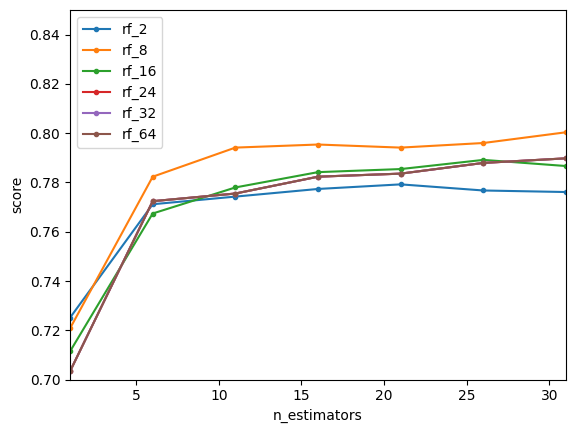

In [68]:
# the following code was gotten from the lab (but modified for simplicity and to apply it to our data),
# as what was learned there was applied to this assignment.
# Full credit goes to Renato

# function used to create visualizations that will help us determine the optimal number of max_depth
def plot_live(X, y, evaluator, param_name, param_range, scale='log', ylim=(0.7,0.85), ylabel='score', marker = '.'):
    """ Renders a plot that updates with every evaluation from evaluator.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    evaluator -- a function with signature (X, y, param_value) that returns a dictionary of scores.
                 Examples: {"train": 0.9, "test": 0.95} or {"model_1": 0.9, "model_2": 0.7}
    param_name -- the parameter that is being varied on the X axis. Can be a hyperparameter, sample size,...
    param_range -- list of all possible values on the x-axis
    scale -- defines which scale to plot the x-axis on, either 'log' (logarithmic) or 'linear'
    ylim -- tuple with the lowest and highest y-value to plot (e.g. (0, 10))
    ylabel -- the y-axis title
    """
    # Plot interactively
    plt.ion()
    plt.ylabel(ylabel)
    plt.xlabel(param_name)

    # Make the scale look nice
    plt.xscale(scale)
    plt.xlim(param_range[0],param_range[-1])
    plt.ylim(ylim)

    # Start from empty plot, then fill it
    series = {}
    lines = {}
    xvals = []
    for i in param_range:
        scores = evaluator(X, y, i)
        if i == param_range[0]: # initialize series
            for k in scores.keys():
                lines[k], = plt.plot(xvals, [], marker = marker, label = k)
                series[k] = []
        xvals.append(i)
        for k in scores.keys(): # append new data
            series[k].append(scores[k])
            lines[k].set_data(xvals, series[k])
        # refresh plot
        plt.legend(loc='best')
        plt.margins(0.1)
        display.display(plt.gcf())
        display.clear_output(wait=True)

# funcition used to run several random forest models with varying depths
def evaluate_RF(X, y, n_estimators, max_depths, scoring):
    res = {}

    for md in max_depths:
        forest = RandomForestClassifier(n_estimators, max_depth=md, random_state=42)
        rf = cross_val_score(forest, X, y, cv=5, scoring=scoring)
        res['rf_' + str(md)] = sum(rf)/len(rf)

    return res

def evaluate_RF_accuracy(X, y, n_estimators):
    return evaluate_RF(X, y, n_estimators, max_depths=[2, 8, 16, 24, 32, 64], scoring="accuracy")


plot_live(X_train, y_train, evaluator = evaluate_RF_accuracy, param_name='n_estimators', param_range=range(1, 32, 5), scale='linear')


Initially, when looking at a low number of estimators the random forest model with a depth of 2 performed the best. This quickly changed after passing ~4 number of estimators, the model with depth 8 mainly outperformed the rest by an evident margin.The random forest model with depth 32 seems to be following the same trend as the model with depth 64 (which explains why the line is not very visible in the plot). This illustrtes that after a certain point adding more complexity to the model actually does not lead to better results (and sometimes even worse when compared to the depth 8 model). Another reason for the lines to behave the same is likely because the trees do not grow much deeper on this dataset. Based on this illutration the optimal max_depth of the tree was chosen to be 8.


Now we will look at another fine tuning technique that is used to determine the best hyperparamters: gridsearch. Gridseach will be performed to fine tune n_estimators (how many tress to grow), max_features (number of features), and criterion (function used to measure quality of split), along with 5-fold cross-validation.  

In [71]:
rf_grid = RandomForestClassifier(max_depth = 8, random_state=42) # 8 as this is the optimal number according the plot above
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250], #considering this number of estimators
    'max_features': [10, 15, 20, 25], # considering this range of features
    'criterion': ['gini', 'entropy']}


grid_searches_rf = GridSearchCV(rf_grid, param_grid, cv = 5, scoring='accuracy', n_jobs=-1) # performing 5 fold cross validation
model_grid_rf = grid_searches_rf.fit(X_train, y_train)

print('Best hyperparameters are '+str(model_grid_rf.best_params_))
print('Best score is: ' + str(model_grid_rf.best_score_))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best hyperparameters are {'criterion': 'entropy', 'max_features': 20, 'n_estimators': 250}
Best score is: 0.8028521119947369


According to the results above, the best hyperparameters are entropy, a max number of features of 20, and 250 number of estimators.

Now we will test the accuracy score of the best model determined by grid search and compare it to our baseline model.

In [72]:
# defining model with best parameters based on the grid search
best_rf_model = model_grid_rf.best_estimator_

# make predictions on both train and test sets
y_train_pred_best_rf_model = best_rf_model.predict(X_train)
y_test_pred_best_rf_model = best_rf_model.predict(X_test)

# calculate train and test accuracy
train_accuracy_best_xgb_model = accuracy_score(y_train, y_train_pred_best_rf_model)
test_accuracy_best_xgb_model = accuracy_score(y_test, y_test_pred_best_rf_model)

print(f'Train accuracy (best RF model): {train_accuracy_best_xgb_model:.2f}')
print(f'Test accuracy (best RF model): {test_accuracy_best_xgb_model:.2f}')

Train accuracy (best RF model): 0.92
Test accuracy (best RF model): 0.78


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The train accuracy of this finetuned model went down from 99.6% to 92%. The test accuracy of this model is slightly lower to the accuracy of our baseline one (79.7%). The smaller gap between the train and test set scores indicate that we were able to slightly reduce overfitting. However, the new model is less accurate.

In [74]:
# calculate other metrics for the test set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, classification_report

precision_rf_b = precision_score(y_test, y_test_pred_best_rf_model)
recall_rf_b = recall_score(y_test, y_test_pred_best_rf_model)
f1__rf_b = f1_score(y_test, y_test_pred_best_rf_model)
roc_auc_rf_b = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

print(f'Precision (RF): {precision_rf_b:.2f}')
print(f'Recall (RF): {recall_rf_b:.2f}')
print(f'F1-score (RF): {f1__rf_b:.2f}')
print(f'ROC-AUC score (RF): {roc_auc_rf_b:.2f} \n')
print(classification_report(y_test, y_test_pred_rf_base))

Precision (RF): 0.71
Recall (RF): 0.46
F1-score (RF): 0.56
ROC-AUC score (RF): 0.83 

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       283
           1       0.75      0.47      0.58       120

    accuracy                           0.80       403
   macro avg       0.78      0.70      0.72       403
weighted avg       0.79      0.80      0.78       403



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The precision, recall, and f1-score of our fine-tuned model is slighly lower than the baseline. The ROC-AUC score remained the same. Still our model is best at classifying negative instances than positive ones.

The ROC curve was plot below to visualize the model's true positive rate in comparison to false positive rate.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


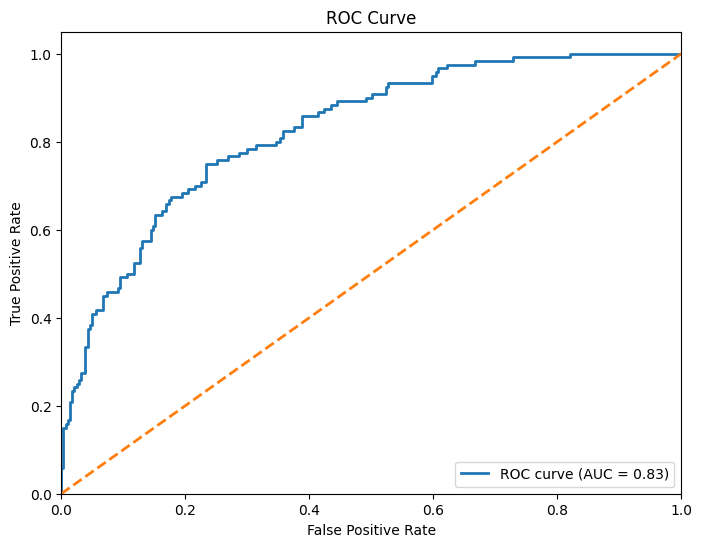

In [75]:
# get predicted probabilities for the positive class for the test set
y_test_pred_prob_best_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob_best_rf_model)
roc_auc = roc_auc_score(y_test, y_test_pred_prob_best_rf_model)

# plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

As an attempt of improving this model even further, some features will be deleted based on the feature of importance score of our fine-tuned model.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


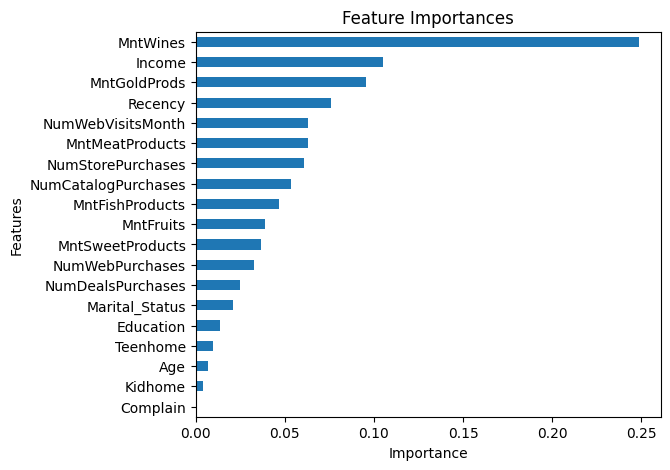

In [76]:
# get feature importances from the best model
feature_importances = best_rf_model.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X.columns).sort_values()

# plotting the feature importances
plt.figure(figsize=(6, 5))
feature_importance_series.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

As we can see the most important features for determining whether a marketing campaign was accepted or not are `MntWines`(by a much greater extent), `Income`, and `MntGoldProds`. `Complain` does not seem to have any importance to this classification. Other features that barely have any importance include `Kidhome`, `Age`, `Teenhome`, `Education`, `Marital_Status`, `NumDealsPurchases`, and `NumWebPurchases`, hence, a new model exclusing these variables will be run as an attempt to reduce overfitting.

Additionally, this model will be run using the optimal features the model above found.

In [77]:
# dropping variables 'Complain', 'Kidhome', "Teenhome", 'Age', 'Education','Marital_Status', 'NumDealsPurchases', 'NumWebPurchases'
X_train_less_feat = X_train.drop(['Complain', 'Kidhome', "Teenhome", 'Age', 'Education','Marital_Status', 'NumDealsPurchases', 'NumWebPurchases' ], axis=1)
X_test_less_feat = X_test.drop(['Complain', 'Kidhome', "Teenhome", 'Age', 'Education','Marital_Status', 'NumDealsPurchases', 'NumWebPurchases' ], axis=1)

# running model with less features
rf_less_feat = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features= 20, n_estimators= 250, random_state=42) # optimal finetuned hyperparameters
rf_less_feat.fit(X_train_less_feat, y_train)

### making predictions
y_train_pred_rf_less_feat = rf_less_feat.predict(X_train_less_feat)
y_test_pred_rf_less_feat = rf_less_feat.predict(X_test_less_feat)


### calculating accuracy scores
train_acc_score = accuracy_score(y_train, y_train_pred_rf_less_feat)
test_acc_score = accuracy_score(y_test, y_test_pred_rf_less_feat)


print("Train set accuracy:", train_acc_score )
print("Test set accuracy:", test_acc_score )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train set accuracy: 0.9110696517412935
Test set accuracy: 0.7866004962779156


Compared to our finetuned model, accuracy on the test set slightly increased by reducing the number of features from 0.78 to 0.79, but is still lower than the baseline model. The slight reduction in train set accuracy, means we were able to slightly reduce overfitting as well.

In [ ]:
# calculate other metrics for the test set
precision_rf_b = precision_score(y_test, y_test_pred_rf_less_feat)
recall_rf_b = recall_score(y_test, y_test_pred_rf_less_feat)
f1__rf_b = f1_score(y_test, y_test_pred_rf_less_feat)
roc_auc_rf_b = roc_auc_score(y_test, rf_less_feat.predict_proba(X_test_less_feat)[:, 1])

print(f'Precision (RF): {precision_rf_b:.2f}')
print(f'Recall (RF): {recall_rf_b:.2f}')
print(f'F1-score (RF): {f1__rf_b:.2f}')
print(f'ROC-AUC score (RF): {roc_auc_rf_b:.2f} \n')
print(classification_report(y_test, y_test_pred_rf_base))

Precision (RF): 0.72
Recall (RF): 0.46
F1-score (RF): 0.56
ROC-AUC score (RF): 0.83 

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       283
           1       0.75      0.47      0.58       120

    accuracy                           0.80       403
   macro avg       0.78      0.70      0.72       403
weighted avg       0.79      0.80      0.78       403



Compared to the fine-tuned model, removing features resulted in a slightly higher precision score. The rest of the measures remained the same.

In conclusion, this model was able to slightly improve the performance of the fine-tuned model in terms of accuracy and precision. However, the baseline model still outperforms the rest but is more prone to overfitting.

## GXBoost Model


### Unbalanced data

In [ ]:
# loading the required packages for this model and its evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score, f1_score, roc_auc_score, roc_curve

# fitting XGBoost classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# make predictions
y_train_pred_xgb_model = xgb_model.predict(X_train)
y_test_pred_xgb_model = xgb_model.predict(X_test)

# calculate accuracy for both train and test sets
train_accuracy_xgb_model = accuracy_score(y_train, y_train_pred_xgb_model)
test_accuracy_xgb_model = accuracy_score(y_test, y_test_pred_xgb_model)

print(f'Training accuracy (XGBoost): {train_accuracy_xgb_model:.2f}')
print(f'Test accuracy (XGBoost): {test_accuracy_xgb_model:.2f}')


Training accuracy (XGBoost): 1.00
Test accuracy (XGBoost): 0.78


Looking at the accuracies for the training and test sets, it can be seen that the XGBoost model is clearly overfitting on the training set, as there is a difference of 22% between the training and test set. The results for some other metrics are also not particularly high (see the code below).



In [ ]:
# calculate other metrics for the test set
precision_xgb_model = precision_score(y_test, y_test_pred_xgb_model)
recall_xgb_model = recall_score(y_test, y_test_pred_xgb_model)
f1_xgb_model = f1_score(y_test, y_test_pred_xgb_model)
roc_auc_xgb_model = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f'Precision (XGBoost): {precision_xgb_model:.2f}')
print(f'Recall (XGBoost): {recall_xgb_model:.2f}')
print(f'F1-score (XGBoost): {f1_xgb_model:.2f}')
print(f'ROC-AUC score (XGBoost): {roc_auc_xgb_model:.2f} \n')
print(classification_report(y_test, y_test_pred_xgb_model))


Precision (XGBoost): 0.68
Recall (XGBoost): 0.53
F1-score (XGBoost): 0.59
ROC-AUC score (XGBoost): 0.83 

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       283
           1       0.68      0.53      0.59       120

    accuracy                           0.78       403
   macro avg       0.75      0.71      0.72       403
weighted avg       0.77      0.78      0.78       403



We notice that the recall in particular is quite low, which indicates that the model is missing many actual positive cases, resulting in a high number of false negatives. The model is doing a decent job at being correct when it predicts an actual positive class as positive, looking at the precision. However, the F1-score is also relatively low, which means that the model’s overall performance is poor. The classfication report also shows that the model is much better at predicting negative instances than positive ones.

Therefore, we will start with performing hyperparameter tuning using Grid Search with 5-fold cross-validation. The parameters of the grid search have been experimented with, resulting in the values of param_grid below. Cross-validation has also been performed to provide reliable results of the accuracy.


In [ ]:
# grid search with 5-fold cross-validation, runtime is about 3 min
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'n_estimators': [50, 100, 150, 200, 250]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# fit grid search on the training data
grid_search.fit(X_train, y_train)

# print best parameters and accuracy score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best cross-validation score: 0.800990692904549


We can see that some of the optimal parameters include a learning rate of 0.05, a max tree depth of 3 and the number of estimators of 100. These will be implemented in the model below, to see if the model’s performance improves.

In [ ]:
# defining model with best parameters based on the grid search
best_xgb_model = grid_search.best_estimator_

# make predictions on both train and test sets
y_train_pred_best_xgb_model = best_xgb_model.predict(X_train)
y_test_pred_best_xgb_model = best_xgb_model.predict(X_test)

# calculate train and test accuracy
train_accuracy_best_xgb_model = accuracy_score(y_train, y_train_pred_best_xgb_model)
test_accuracy_best_xgb_model = accuracy_score(y_test, y_test_pred_best_xgb_model)

print(f'Train accuracy (best XGBoost model): {train_accuracy_best_xgb_model:.2f}')
print(f'Test accuracy (best XGBoost model): {test_accuracy_best_xgb_model:.2f}')

Train accuracy (best XGBoost model): 0.85
Test accuracy (best XGBoost model): 0.80


Compared to the initial training and test accuracy of 1.00 and 0.78, the accuracies obtained after the hyperparameter tuning have improved a lot. It has especially reduced the overfitting issue, bringing the training accuracy from 1.00 down to 0.85. Additionally, it has improved the test set accuracy by 2%.


In [ ]:
# calculate other metrics for the test set
precision_best_xgb_model = precision_score(y_test, y_test_pred_best_xgb_model)
recall_best_xgb_model = recall_score(y_test, y_test_pred_best_xgb_model)
f1_best_xgb_model = f1_score(y_test, y_test_pred_best_xgb_model)
roc_auc_best_xgb_model = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

print(f'Precision (best XGBoost model): {precision_best_xgb_model:.2f}')
print(f'Recall (best XGBoost model): {recall_best_xgb_model:.2f}')
print(f'F1-score (best XGBoost model): {f1_best_xgb_model:.2f}')
print(f'ROC-AUC score (best XGBoost model): {roc_auc_best_xgb_model:.2f} \n')
print(classification_report(y_test, y_test_pred_best_xgb_model))

Precision (best XGBoost model): 0.75
Recall (best XGBoost model): 0.47
F1-score (best XGBoost model): 0.58
ROC-AUC score (best XGBoost model): 0.84 

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       283
           1       0.75      0.47      0.58       120

    accuracy                           0.80       403
   macro avg       0.78      0.70      0.72       403
weighted avg       0.79      0.80      0.78       403



We can see that the precision and ROC-AUC score have improved a bit compared to the model before the hyperparameter tuning, but the F1-score and especially the recall have become worse. This might indicate that the model has become less sensitive to identifying all positive instances, but is doing a better job at being correct when identifying positive instances. The classfication report also shows that the model is much better at predicting negative instances than positive ones, this has not changed compared to the initial model.

An ROC Curve is plotted below, to see what the model performance looks like.

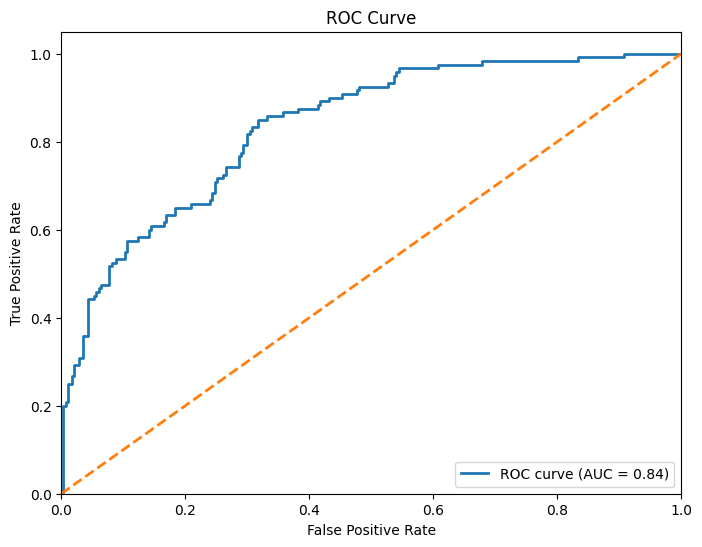

In [ ]:
b# get predicted probabilities for the positive class for the test set
y_test_pred_prob_best_xgb_model = best_xgb_model.predict_proba(X_test)[:, 1]

# compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob_best_xgb_model)
roc_auc = roc_auc_score(y_test, y_test_pred_prob_best_xgb_model)

# plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Based on the evaluation metrics and the ROC Curve, it seems like the model is still not performing that well. Therefore, we will look at the feature importances to see if there might be some features that can be removed to improve the model. In the code below, we will look at the feature importances from the model that was found through the Grid Search.

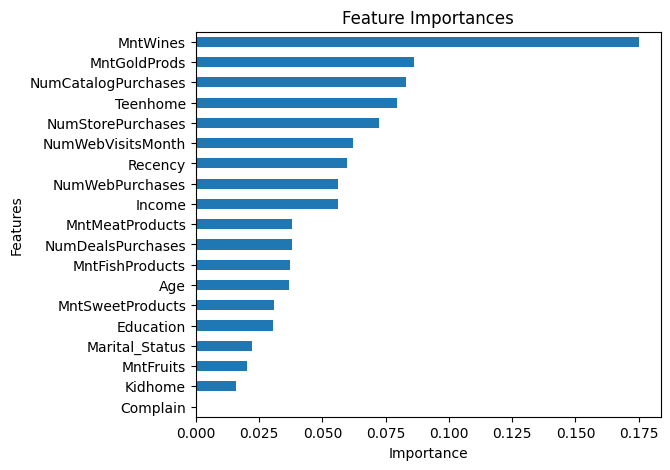

In [ ]:
# get feature importances from the best model
feature_importances = best_xgb_model.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X.columns).sort_values()

# plotting the feature importances
plt.figure(figsize=(6, 5))
feature_importance_series.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

We can see that `MntWines` is a very important feature for the predictions, while `Complain` does not seem to contribute anything. Based on the graph, it was decided to remove all features from the model below the feature `Age`, as they all have relatively low importance.

In [ ]:
# removing the variables AcceptedCmp, Complain, Kidhome, MntFruits, and Marital_Status
X_xgb_reduced = marketing_df.drop(['AcceptedCmp', 'Complain', 'Kidhome', 'MntFruits', 'Marital_Status'], axis=1)

# splitting the data in train and test set
X_train_xgb_reduced, X_test_xgb_reduced, y_train_xgb_reduced, y_test_xgb_reduced = train_test_split(X_xgb_reduced, y, test_size=0.2, random_state=42)

# use the parameters from the grid search
best_xgb_model_reduced = grid_search.best_estimator_

# fit the model
best_xgb_model_reduced.fit(X_train_xgb_reduced, y_train_xgb_reduced)

# make predictions
y_train_pred_reduced = best_xgb_model_reduced.predict(X_train_xgb_reduced)
y_test_pred_reduced = best_xgb_model_reduced.predict(X_test_xgb_reduced)

# calculate train and test accuracy
train_accuracy_reduced = accuracy_score(y_train_xgb_reduced, y_train_pred_reduced)
test_accuracy_reduced = accuracy_score(y_test_xgb_reduced, y_test_pred_reduced)

print(f'Train accuracy (XGBoost): {train_accuracy_reduced:.2f}')
print(f'Test accuracy (XGBoost): {test_accuracy_reduced:.2f}')

Train accuracy (XGBoost): 0.85
Test accuracy (XGBoost): 0.80


We can see that the train and test accuracy have stayed the same, which means that the features that have been removed from the model were not very important. Although the accuracies did not improve, the model has become less complex by using less features.

In [ ]:
# calculate other metrics
precision_reduced = precision_score(y_test_xgb_reduced, y_test_pred_reduced)
recall_reduced = recall_score(y_test_xgb_reduced, y_test_pred_reduced)
f1_reduced = f1_score(y_test_xgb_reduced, y_test_pred_reduced)
roc_auc_reduced = roc_auc_score(y_test_xgb_reduced, best_xgb_model_reduced.predict_proba(X_test_xgb_reduced)[:, 1])

print(f'Precision (XGBoost): {precision_reduced:.2f}')
print(f'Recall (XGBoost): {recall_reduced:.2f}')
print(f'F1-score (XGBoost): {f1_reduced:.2f}')
print(f'ROC-AUC score (XGBoost): {roc_auc_reduced:.2f} \n')
print(classification_report(y_test_xgb_reduced, y_test_pred_reduced))

Precision (XGBoost): 0.74
Recall (XGBoost): 0.48
F1-score (XGBoost): 0.59
ROC-AUC score (XGBoost): 0.84
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       283
           1       0.74      0.48      0.59       120

    accuracy                           0.80       403
   macro avg       0.78      0.71      0.73       403
weighted avg       0.79      0.80      0.78       403



We can see that the precision, recall, F1-score and ROC-AUC score have more or less stayed the same, with some minor differences (± 0.01). This is not very surprising, since the accuracies did not change as well.

Overall, we can say that the XGBoost model performs very well in predicting negative instances. However, it performs quite poorly in predicting positive instances, which also results in a relatively poor overall model performance.



## AdaBoost Model

In [ ]:
# loading the required packages for this model and its evaluation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, recall_score, f1_score, roc_auc_score, roc_curve

# fitting AdaBoost classifier
ada_model = AdaBoostClassifier(algorithm='SAMME') # fitting AdaBoost classifier with 'SAMME' algorithm to avoid the deprecation warning
ada_model.fit(X_train, y_train)

# make predictions
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

# calculate accuracy for both train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training accuracy (AdaBoost): {train_accuracy:.2f}')
print(f'Test accuracy (AdaBoost): {test_accuracy:.2f}')

Training accuracy (AdaBoost): 0.82
Test accuracy (AdaBoost): 0.77


In [ ]:
# calculate other metrics for the test set
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, ada_model.predict_proba(X_test)[:, 1])

print(f'Precision (AdaBoost): {precision:.2f}')
print(f'Recall (AdaBoost): {recall:.2f}')
print(f'F1-score (AdaBoost): {f1:.2f}')
print(f'ROC-AUC score (AdaBoost): {roc_auc:.2f} \n')
print(classification_report(y_test, y_test_pred))

Precision (AdaBoost): 0.66
Recall (AdaBoost): 0.47
F1-score (AdaBoost): 0.55
ROC-AUC score (AdaBoost): 0.82
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       283
           1       0.66      0.47      0.55       120

    accuracy                           0.77       403
   macro avg       0.73      0.68      0.70       403
weighted avg       0.76      0.77      0.76       403



In [ ]:
# grid search with 5-fold cross-validation
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1]
}

grid_search_ada = GridSearchCV(
    estimator=ada_model,
    param_grid=param_grid_ada,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# fit grid search on the training data
grid_search_ada.fit(X_train, y_train)

# print best parameters and accuracy score
print('Best parameters (AdaBoost):', grid_search_ada.best_params_)
print('Best cross-validation score (AdaBoost):', grid_search_ada.best_score_)

Best parameters (AdaBoost): {'learning_rate': 0.1, 'n_estimators': 250}
Best cross-validation score (AdaBoost): 0.7879356049612044


In [ ]:
# defining model with parameters based on the grid search
best_ada_model = grid_search_ada.best_estimator_

# make predictions on both train and test sets
y_train_pred_best_ada_model = best_ada_model.predict(X_train)
y_test_pred_best_ada_model = best_ada_model.predict(X_test)

# calculate train and test accuracy
train_accuracy_best_ada_model = accuracy_score(y_train, y_train_pred_best_ada_model)
test_accuracy_best_ada_model = accuracy_score(y_test, y_test_pred_best_ada_model)

print(f'Train accuracy (best AdaBoost model): {train_accuracy_best_ada_model:.2f}')
print(f'Test accuracy (best AdaBoost model): {test_accuracy_best_ada_model:.2f}')

Train accuracy (best AdaBoost model): 0.79
Test accuracy (best AdaBoost model): 0.77


In [ ]:
# calculate other metrics for the test set
precision_best_ada_model = precision_score(y_test, y_test_pred_best_ada_model)
recall_best_ada_model = recall_score(y_test, y_test_pred_best_ada_model)
f1_best_ada_model = f1_score(y_test, y_test_pred_best_ada_model)
roc_auc_best_ada_model = roc_auc_score(y_test, best_ada_model.predict_proba(X_test)[:, 1])

print(f'Precision (best AdaBoost model): {precision_best_ada_model:.2f}')
print(f'Recall (best AdaBoost model): {recall_best_ada_model:.2f}')
print(f'F1-score (best AdaBoost model): {f1_best_ada_model:.2f}')
print(f'ROC-AUC score (best AdaBoost model): {roc_auc_best_ada_model:.2f} \n')
print(classification_report(y_test, y_test_pred_best_ada_model))

Precision (best AdaBoost model): 0.77
Recall (best AdaBoost model): 0.33
F1-score (best AdaBoost model): 0.47
ROC-AUC score (best AdaBoost model): 0.81
              precision    recall  f1-score   support

           0       0.77      0.96      0.85       283
           1       0.77      0.33      0.47       120

    accuracy                           0.77       403
   macro avg       0.77      0.65      0.66       403
weighted avg       0.77      0.77      0.74       403



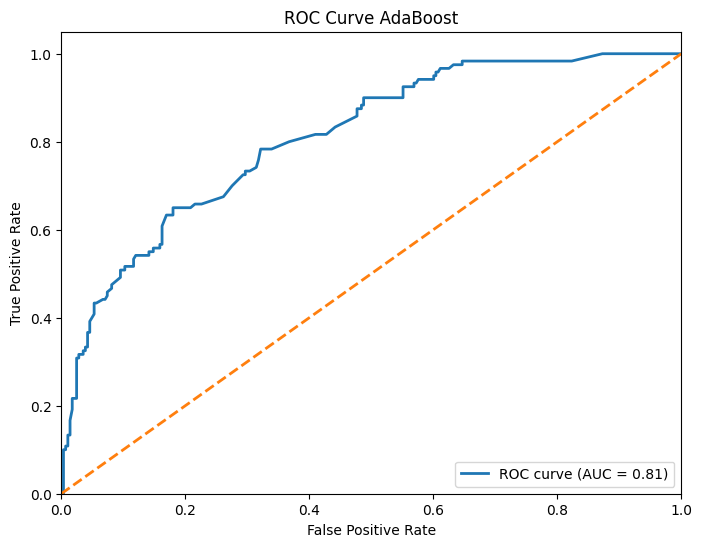

In [ ]:
# ROC Curve
y_test_pred_prob_best_ada_model = best_ada_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob_best_ada_model)
roc_auc = roc_auc_score(y_test, y_test_pred_prob_best_ada_model)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve AdaBoost')
plt.legend(loc='lower right')
plt.show()

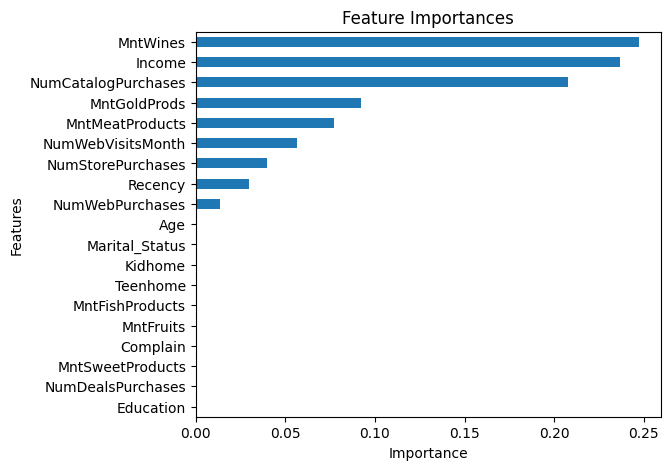

In [ ]:
# get feature importances from the best model
feature_importances = best_ada_model.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X.columns).sort_values()

# plotting the feature importances
plt.figure(figsize=(6, 5))
feature_importance_series.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# removing the variables AcceptedCmp, Complain, Kidhome, MntFruits, Marital_Status, Education, MntSweetProducts, NumDealsPurchases, Age, MntFishProducts, Teenhome, NumWebPurchases
X_ada_reduced = marketing_df.drop(['AcceptedCmp', 'Complain', 'Kidhome', 'MntFruits', 'Marital_Status', 'Education', 'MntSweetProducts',
                                   'NumDealsPurchases', 'Age', 'MntFishProducts', 'Teenhome', 'NumWebPurchases'], axis=1)

# splitting the data in train and test set
X_train_ada_reduced, X_test_ada_reduced, y_train_ada_reduced, y_test_ada_reduced = train_test_split(X_ada_reduced, y, test_size=0.2, random_state=42)

# use the parameters from the grid search
best_ada_model_reduced = grid_search.best_estimator_

# fit the model
best_ada_model_reduced.fit(X_train_ada_reduced, y_train_ada_reduced)

# make predictions
y_train_pred_reduced = best_ada_model_reduced.predict(X_train_ada_reduced)
y_test_pred_reduced = best_ada_model_reduced.predict(X_test_ada_reduced)

# calculate train and test accuracy
train_accuracy_ada_reduced = accuracy_score(y_train_ada_reduced, y_train_pred_reduced)
test_accuracy_ada_reduced = accuracy_score(y_test_ada_reduced, y_test_pred_reduced)

print(f'Train accuracy (AdaBoost): {train_accuracy_ada_reduced:.2f}')
print(f'Test accuracy (AdaBoost): {test_accuracy_ada_reduced:.2f}')

Train accuracy (AdaBoost): 0.84
Test accuracy (AdaBoost): 0.80


In [ ]:
# calculate other metrics
precision_reduced = precision_score(y_test_ada_reduced, y_test_pred_reduced)
recall_reduced = recall_score(y_test_ada_reduced, y_test_pred_reduced)
f1_reduced = f1_score(y_test_ada_reduced, y_test_pred_reduced)
roc_auc_reduced = roc_auc_score(y_test_ada_reduced, best_ada_model_reduced.predict_proba(X_test_ada_reduced)[:, 1])

print(f'Precision (AdaBoost): {precision_reduced:.2f}')
print(f'Recall (AdaBoost): {recall_reduced:.2f}')
print(f'F1-score (AdaBoost): {f1_reduced:.2f}')
print(f'ROC-AUC score (AdaBoost): {roc_auc_reduced:.2f} \n')
print(classification_report(y_test_ada_reduced, y_test_pred_reduced))

Precision (AdaBoost): 0.75
Recall (AdaBoost): 0.47
F1-score (AdaBoost): 0.58
ROC-AUC score (AdaBoost): 0.83
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       283
           1       0.75      0.47      0.58       120

    accuracy                           0.80       403
   macro avg       0.78      0.70      0.72       403
weighted avg       0.79      0.80      0.78       403



# Results

# Bibliography
Second-cycle programmes. (2023, November 27). https://eurydice.eacea.ec.europa.eu/national-education-systems/republic-north-macedonia/second-cycle-programmes#:~:text=Second%20cycle%20programs%20are%20provided,and%20awards%20a%20master%20degree.

Selecting the number of clusters with silhouette analysis on KMeans clustering. (n.d.). Scikit-learn. https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html